# Notebook to generate the figure panels.

In [5]:
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna 
import pandas as pd
import numpy as np
import itertools
import re
import matplotlib.pyplot as plt
from collections import defaultdict 
import scipy
from scipy import stats
import glob
import warnings
warnings.filterwarnings('ignore')
import os
import operator
import logomaker
import matplotlib
import statsmodels
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pickle
import unicodedata
from sklearn import svm
from sklearn import metrics
from sklearn import ensemble
import sklearn

import matplotlib.patches as mpatches
from localcider.sequenceParameters import SequenceParameters
import localcider
from statsmodels.formula.api import ols
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
lightblue , darkblue, lightgreen, darkgreen, pink =  '#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99'
greens = ['#edf8fb','#ccece6','#99d8c9','#66c2a4','#2ca25f','#006d2c']
purples =['#f2f0f7','#dadaeb','#bcbddc','#9e9ac8','#756bb1','#54278f']
purpleblue = ['#edf8fb','#bfd3e6','#9ebcda','#8c96c6','#8856a7','#810f7c']
redorange = ['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#e34a33','#b30000']
reds =['#fee5d9','#fcbba1','#fc9272','#fb6a4a','#de2d26','#a50f15']
blueMulti =['#f1eef6','#d0d1e6','#a6bddb','#74a9cf','#2b8cbe','#045a8d']
blues =['#f1eef6','#d0d1e6','#a6bddb','#74a9cf','#2b8cbe','#045a8d']
oranges=['#feedde','#fdd0a2','#fdae6b','#fd8d3c','#e6550d','#a63603']
import matplotlib.patches as mpatches
from matplotlib.patches import Polygon
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_family('sans serif')
font.set_name('Helvetica')
import unicodedata

# custom functions
# import StableAnalaysisFunctions as saf




In [6]:
Folder = 'PaperFigures_Revision/'

if (os.path.isdir('Figures/')):
    print 'Figures folder exists'
else:
    os.mkdir('Figures')
if (os.path.isdir('Figures/'+Folder)):
    print 'Today I will save files in Figures/%s' %Folder
else:
    os.mkdir('Figures/'+Folder)
if (os.path.isdir('Figures/'+Folder+'BarGraphs/')):
    print ''
else:
#     os.mkdir('Figures/'+Folder+'/Logos')
#     os.mkdir('Figures/'+Folder+'/SequenceLists')
    os.mkdir('Figures/'+Folder+'BarGraphs')
    os.mkdir('Figures/'+Folder+'LineGraphs')

    
    
## load data frames
# BCDF   =pd.read_pickle('pickleFiles/MSS18_BCDF_afterProcessingStep2_20210617')
masterDF   =pd.read_pickle('pickleFiles/MSS18_MasterDF_afterProcessingStep2_20210722')
WTDF = pd.read_pickle('pickleFiles/MSS18_WTDF_afterProcessingStep2_20210722')

Figures folder exists
Today I will save files in Figures/PaperFigures_Revision/



In [7]:
## variables

summaryCols = [ 'MutName','HandDesigned', u'WT','CITED2_N', 'stat3', 'Hif1-AD2_46',
       'p65_L2Y', 'p65', 'vp16N_C', u'ADseq','Activity_Mean_MSS18']


currentItem ='Activity_Mean_MSS18'
currentSTD  ='Activity_std_MSS18'
# currentSTD  ='Activity_std_MSS18'
# currentItem ='Zscore_Mean_MSS18'
# currentSTD = 'Zscore_SEM_MSS18'
currentItemLabel = {'Activity_Mean_MSS18':'Activity','Zscore_Mean_MSS18':'Activity (Z score)'}
# masterDF.MSS
# Useful plotting variables
maxActivity = max(masterDF[currentItem])*1.1
minActivity = min(masterDF[currentItem])*1.15

## support variables
ADlist = [ 'CITED2_N','Hif1-AD2_46','vp16N_C','stat3','p65']
cited, hif1a,vp16,stat3,p65 = ADlist
ExtendedADlist = [ 'CITED2_N','Hif1-AD2_46','vp16N_C','stat3','p65','p65_L2Y']
ADCoordinates={ 'CITED2_N':[220,258],# isoform 1
               'Hif1-AD2_46':[781,896],# isoform 1
               'vp16N_C':[415,453], #from blast
               'stat3':[719,764],# isoform 1
               'p65':[521,551]}# isoform 1
## WT support dictionaries
## WT support dictionaries
WTname2seqDict,WTseq2nameDict,WTname2currentItemDict,WTname2currentSTDDict = pickle.load(open('pickleFiles/WTDictionaries','r'))
WTname2currentItemDict = WTname2currentItemDict[currentItem]
WTname2currentSTDDict = WTname2currentSTDDict[currentItem]
WTname2currentSTDDict

{'CITED2_N': 417.82604160154875,
 'Hif1-AD2_46': 129.24528958308261,
 'p65': 97.548557547057669,
 'stat3': 143.00600745660876,
 'vp16N_C': 340.3560192174665}

In [8]:
def visualize_AA_Changes(AD_DF,WT,plotname,color='r',colname='shortname'):
    fig3, axes = plt.subplots( figsize=(18,len(AD_DF)*.3+1))
    ypos = 0
    
    # print WT
    for pos, ADaa in enumerate(WT):
        plt.text(pos,ypos, ADaa, color='k',fontsize=14, fontweight='bold')
    plt.text(pos+3,ypos,'WT',fontsize=12)
    ypos+=1
    # for each variant
    for j,entry in AD_DF.iterrows():
        AD = entry.ADseq
        for pos, ADaa in enumerate(AD):
            if ADaa == WT[pos]:
                # print AA in black if it is WT
                plt.text(pos,ypos, ADaa, color='k',fontsize=14, fontweight='bold')
            else:
                # print AA in red if it is NOT WT
                plt.text(pos,ypos, ADaa, color=color,fontsize=14, fontweight='bold')

        plt.text(pos+3,ypos,'%.1f'%entry[currentItem],fontsize=12)

        plt.text(pos+6,ypos,entry[colname],fontsize=12)
        ypos+=1
    plt.axis([-1, pos+12, ypos,-1])
    plt.xticks([]),    plt.yticks([])
    plt.title(plotname)
    plt.savefig('Figures/'+Folder+plotname+'MutantList.pdf')
    plt.show()

def visualize_AAset_DF(AD_DF,AAsets,AAset_Labels, colorSets,Folder,colname='shortname'):
    fig3, axes = plt.subplots( figsize=(18,len(AD_DF)*.3+1))
    ypos = 0
    for j,entry in AD_DF.iterrows():
        AD = entry.ADseq
        for pos, ADaa in enumerate(AD):
            plt.text(pos,ypos, ADaa, color='k',fontsize=14, fontweight='bold')
        for i, aaList in enumerate(AAsets):
            for pos, ADaa in enumerate(AD):
                if ADaa in aaList:
                    plt.text(pos,ypos, ADaa, color=colorSets[i],fontsize=14, fontweight='bold')
        plt.text(pos+3,ypos,entry[colname],fontsize=12)
        ypos+=1
    plt.axis([-1, pos+12, ypos,-1])
    plt.xticks([]),    plt.yticks([])
    plt.title(entry.shortname)
    plt.savefig('Figures/'+Folder+'MutantList.png')
    plt.show()
AAsets= [['D','E'],['W','L','F','Y','M','I'],['K','R'],['S','T'],['P','G']]
AAset_Labels = [ 'Negatives','Hyrdophobics','Positives','Phospho sites','Prolines & Glycines']
colorSets = ['red','limegreen','blue','deepskyblue','darkviolet']



def findMutant(ad,mutname,cols=['shortname', 'MutName']):
    indx = (masterDF[ad]==1)
    tempDF = masterDF[indx]
    for i, entry in tempDF.iterrows():
        tempname = entry.MutName
        hits = re.search(mutname,tempname)
        if hits:
            print entry[cols]

def plotwtPatch(ad,plotwidth):
    WTactivity,WTSEM = WTname2currentItemDict[ad],WTname2currentSTDDict[ad]
    minX = -1
    maxX = plotwidth
    WTmean = WTname2currentItemDict[ad]
    WTsem = WTname2currentSTDDict[ad]
    plt.plot([minX,maxX],[WTmean,WTmean],color='k',label='WT Exp Mean')
    WTstdPatch = mpatches.Rectangle((minX,(WTmean-WTsem)),maxX-minX,2*WTsem,alpha=0.3,facecolor='gray')
    ax.add_patch(WTstdPatch)
        

In [9]:
# colors
TitleDict ={'CITED2_N':'CITED2', 'Hif1-AD2_46':'Hif1'+unicodedata.lookup('greek small letter alpha'), 'vp16N_C':'VP16 H1', 'stat3':'Stat3', 'p65':'p65'}
ADcolorDict = {'vp16N_C':'orange', 'CITED2_N':'red', 'Hif1-AD2_46':darkgreen, 'p65':darkblue, 'stat3':purples[-1]}

indx = masterDF.CITED2_N | masterDF.vp16N_C | masterDF[hif1a]
print sum(indx)
print sum(masterDF.CITED2_N)
print sum(masterDF[hif1a])
print sum(masterDF.vp16N_C)
print sum(masterDF.p65)
print sum(masterDF.p65_L2Y)
print sum(masterDF.stat3)



302
117
112
73
106
6
111


# Figure 1 
Mutation design

In [10]:
indx = masterDF[hif1a]
temp = masterDF[indx]
temp = temp[temp.SigDiff_NormToNoAD]
temp = temp[temp[currentItem]>WTname2currentItemDict[hif1a]]
temp[['MutName','ADseq',currentItem,currentSTD]]
# summaryCols

,MutName,ADseq,Activity_Mean_MSS18,Activity_std_MSS18
ADseq,,,,
DLLGQSMDESGLPQLTSYDCEVNAPIQGSDNLLQGEELLDALDQVN,RK>D,DLLGQSMDESGLPQLTSYDCEVNAPIQGSDNLLQGEELLDALDQVN,4858.260837,808.684618
ELLGQSMDESGLPQLTSYDCEVNAPIQGSEFLLQGEELLDALDQVN,supercharge6,ELLGQSMDESGLPQLTSYDCEVNAPIQGSEFLLQGEELLDALDQVN,4746.673271,996.520233
RLLGQSMDESGLPQLTSYDCEVNAPIQGSDNLLQGEELLDALDQVN,RK>Dmut29to46,RLLGQSMDESGLPQLTSYDCEVNAPIQGSDNLLQGEELLDALDQVN,3614.118375,225.118882
RLLGQSMDESGLPQLTSYDCEVNAPIQGSRDLLDGEELLRALDDVD,"QN>Dmut29to46,STQN>Dmut29to46",RLLGQSMDESGLPQLTSYDCEVNAPIQGSRDLLDGEELLRALDDVD,3951.596786,598.645076
RLLGQSMDESGLPQLTSYDCEYNAPIQGSRNLLQGEELLRALDQYN,V>Y,RLLGQSMDESGLPQLTSYDCEYNAPIQGSRNLLQGEELLRALDQYN,3163.604662,203.852103


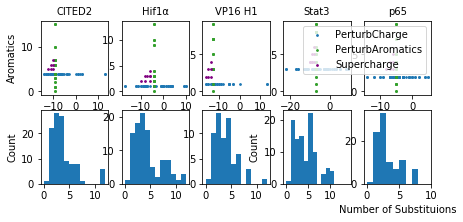

In [11]:
# histograms of changes 
# excluding the shuffle mutants which have very large hamming distances
fig = plt.figure(figsize=(7,3))
colorsDict = {'PerturbCharge':darkblue,'PerturbAromatics':darkgreen,'HandDesigned':'purple','Supercharge':'purple'}
mutsets = ['PerturbCharge','PerturbAromatics','Supercharge']
prop1,prop2 = 'Charge','Aromatics'
    
for i,ad in enumerate(ADlist):
    # 2d plot of mutations
    # masterDF['Supercharge']= masterDF.apply(lambda row: 'supercharge' in row['shortname'],axis=1)
    plt.subplot(2,5,i+1)
    for mutset in mutsets:
        indx = masterDF[ad]&masterDF[mutset]
        tempDF = masterDF[indx]
        plt.scatter(tempDF[prop1],tempDF[prop2],c=colorsDict[mutset],label=mutset,s=3)
    plt.title(TitleDict[ad],fontproperties=font) 
    if i ==2:
        plt.xlabel(prop1)

    if i ==0:
        plt.ylabel(prop2)
    if i ==4:
        plt.legend()
#     plt.savefig('Figures/'+Folder+'Figure1_IllustrateMutagenesis.pdf')
#     plt.show()
    
    indx = masterDF[ad] & ~(masterDF.Shuffle)
    temp = masterDF[indx]
    plt.subplot(2,5,i+1+5)
    bins = np.arange(0,max(temp.Hamming))
    plt.hist(temp.Hamming,bins)
    plt.xticks([0,5,10])
    if i >3:
        plt.xlabel('Number of Substituions',fontproperties=font)
    if (i ==0) or (i==3):
        plt.ylabel('Count',fontproperties=font)
# plt.tight_layout()
plt.savefig('Figures/'+Folder+'Figure1_NumberSubstitutions.pdf')

plt.show()


# Figure 2 Activity hists

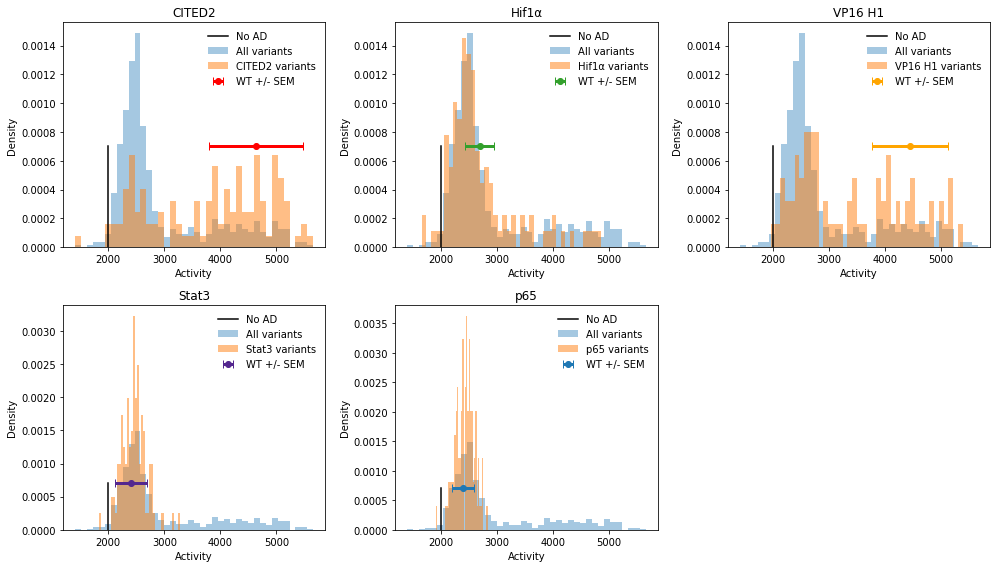

In [12]:
yLevelDict ={'Activity_Mean_MSS18':.0007,'Zscore_Mean_MSS18':1}
fig = plt.figure(figsize=(14,8))
for i, ad in enumerate(ADlist):
    plt.subplot(2,3,i+1)
    plt.hist(masterDF[currentItem],40,normed=1,alpha=.4,label='All variants')
    indx = masterDF[ad]==1
    temp = masterDF[indx]
    plt.hist(temp[currentItem],40,normed=1,alpha=.5,label=TitleDict[ad]+' variants')
    WT = WTDF[WTDF[ad]==1]
    plt.title(TitleDict[ad]),plt.xlabel(currentItem)
    plt.errorbar(WT[currentItem],yLevelDict[currentItem],xerr=WT[currentSTD],fmt='o',capsize=4, elinewidth=3,c=ADcolorDict[ad],label='WT +/- SEM')
    plt.xlabel(currentItemLabel[currentItem]),plt.ylabel('Density')

    # plot the empty TF
    plt.plot([2000,2000],[0,yLevelDict[currentItem]],c='k',label='No AD')

    plt.legend(frameon=False)
plt.tight_layout()
# plt.hist(masterDF[currentItem],40,normed=1,alpha=.4,label='All Data')
plt.savefig('Figures/'+Folder+'Figure2A_ActivityHistbyAD.pdf')
plt.show()

### Figure 2B motifs

In [13]:
### Define the sets for error bar plots (Tie fighter plots)
MutList_VP16 =[    
    'killmotif1','killmotif2',    'F>A','F>L','F>W','F>Y',
    #'A>Y',    #     'supercharge1','supercharge2','supercharge3','supercharge4','supercharge5','supercharge6',
    ]
MutList_VP16_known =['F>A','F>L','F>W','F>Y']
MutList_VP16_helix =[    
    'killmotif1','killmotif2',
    'breakhelixG','breakhelixP',
    'Shuffle_1_1','Shuffle_1_2','Shuffle_1_3','Shuffle_2_1','Shuffle_2_2','Shuffle_2_3','Shuffle_3_1','Shuffle_3_2','Shuffle_3_3',
    ]
MutList_Cited2 = [
    'killmotif1','kilmotif2_LPEL_A','kilmotif2_LPEL_G','killmotif3','killmotif4',]
MutList_Cited2_known = ['kilmotif2_LPEL_A','kilmotif2_LPEL_G']
MutList_Cited2_helix = [
    'killmotif1','kilmotif2_LPEL_A','kilmotif2_LPEL_G','killmotif3','killmotif4',
    'breakhelixG','breakhelixP',
    'Shuffle_1_1','Shuffle_1_2','Shuffle_1_3','Shuffle_2_1','Shuffle_2_2','Shuffle_2_3',
#     'ED>E','ED>Emut0to20','ED>Emut20to39','ED>D','ED>Dmut0to20'#     'supercharge1','supercharge2','supercharge3','supercharge4','supercharge5','supercharge6',
]
MutList_Hif1a = ['killmotif2','killmotif3','killmotif_LPQL_A']
MutList_Hif1a_known = ['killmotif3','killmotif_LPQL_A']
MutList_Hif1a_helix = ['killmotif2','killmotif3',
'killmotif_LPQL_A',# 'killmotif_LPQL_A_plus2As', 'killmotif_LPQL_G_plus2As',
'breakhelix1G','breakhelix1P','Shuffle_1_1','Shuffle_1_2','Shuffle_1_3',
'breakhelix2G','breakhelix2P','Shuffle_2_1','Shuffle_2_2','Shuffle_2_3',
'breakhelix3G','breakhelix3P','Shuffle_3_1','Shuffle_3_2','Shuffle_3_3',
#     'supercharge1','supercharge2','supercharge3','supercharge4','supercharge5','supercharge6',#'superchargeA','superchargeB'
]
MutList_stat3 = ['killmotif1','killmotif2','breakhelixG','breakhelixP',
'Shuffle_1_1','Shuffle_1_2','Shuffle_1_3','Shuffle_2_1','Shuffle_2_2','Shuffle_2_3',]
MutList_p65=['killmotif1','killmotif2','breakhelixG','breakhelixP',
'Shuffle_1_1','Shuffle_1_2','Shuffle_1_3','Shuffle_2_1','Shuffle_2_2','Shuffle_2_3','Shuffle_3_1','Shuffle_3_2','Shuffle_3_3']


print len(MutList_VP16)
print len(MutList_Cited2)
print len(MutList_Hif1a)
# XtickDictmaster 
XtickDictmaster = {'breakhelixG':'2xGlycine','breakhelixP':'2xProline',
'Shuffle_1_1' : 'Shuffle 1.1','Shuffle_1_2' : 'Shuffle 1.2','Shuffle_1_3' : 'Shuffle 1.3',
'Shuffle_2_1' : 'Shuffle 2.1','Shuffle_2_2' : 'Shuffle 2.2','Shuffle_2_3' : 'Shuffle 2.3',
'Shuffle_3_1' : 'Shuffle 3.1','Shuffle_3_2' : 'Shuffle 3.2','Shuffle_3_3' : 'Shuffle 3.3',
# 'killmotif1':unicodedata.lookup('greek capital letter delta')+'motif1',
# 'killmotif2':unicodedata.lookup('greek capital letter delta')+'motif2',
# 'killmotif3':unicodedata.lookup('greek capital letter delta')+'motif3',
# 'killmotif4':unicodedata.lookup('greek capital letter delta')+'motif4',
'F>A':'F442A','F>L':'F442L','F>W':'F442W','F>Y':'F442Y','A>Y':'4As>4Ys',
'killmotif1':'Motif1 >As',
'killmotif2':'Motif2 >As',
'killmotif3':'Motif3 >As',
'killmotif4':'Motif4 >As',
'killmotif_LPQL_A':'LPQL motif >As',
'kilmotif2_LPEL_A':'LPEL motif >As',
'kilmotif2_LPEL_G':'LPEL motif >Gs',
'killmotif_LPQL_A_plus2As':'Motif 3 >As',
'killmotif_LPQL_G_plus2As':'killmotif_LPQL_G_plus2As',
'breakhelix1G':unicodedata.lookup('greek small letter alpha') + '1 1xGlycine',
'breakhelix1P':unicodedata.lookup('greek small letter alpha') + '1 1xProline',
'breakhelix2G':unicodedata.lookup('greek small letter alpha') + '2 2xGlycine',
'breakhelix2P':unicodedata.lookup('greek small letter alpha') + '2 2xProline',
'breakhelix3G':unicodedata.lookup('greek small letter alpha') + '2 2xGlycine',
'breakhelix3P':unicodedata.lookup('greek small letter alpha') + '3 2xProline',
'ED>E':'ED>E',
'ED>D':'ED>D',
'ED>Emut0to20' :'ED>E (N)',
'ED>Emut20to39':'ED>E (C)',
'ED>Dmut0to20' :'ED>D (N)',
#             print(unicodedata.lookup('greek capital letter delta'))
            }
def plotTieFighters(ad,mutlist,XtickDict=XtickDictmaster):
    tempVals ,tempErrors, SigDiffFromWT,namelist =[],[],[],[]
    YpositionForStar = 5000
    for i, mut in enumerate(mutlist):
        indx = (masterDF.shortname==mut)&(masterDF[ad]==1)
        tempDF = masterDF[indx]
        activity = tempDF[currentItem].values
        error = tempDF[currentSTD].values
        tempVals.append(activity[0])
        tempErrors.append(error[0])
        if (ad == hif1a )&(mut== 'killmotif3'):
            namelist.append('LLxxL>A')
        else:
            namelist.append(XtickDict[mut])
        if tempDF.SigDiff_NormToNoAD[0]==1:
            plt.text(i-.1,YpositionForStar,'*')
            SigDiffFromWT.append(i)
    plotwidth = len(tempVals)
    plt.errorbar(np.arange(plotwidth), tempVals,yerr=tempErrors,fmt='.',capsize=2, elinewidth=1,c='k')
    plotwtPatch(ad,plotwidth)
    plt.xticks(np.arange(plotwidth),namelist,rotation=90,fontsize=6)
    plt.xlim(-1,plotwidth)
    plt.title(TitleDict[ad]), 
    plt.ylim(minActivity*1.1,maxActivity*1.2),
    plt.yticks([])


6
5
3


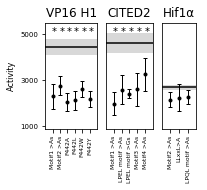

In [14]:
height =.3
left = .2
bottom, height = 0.05, 0.3
spacing = 0.07
horizontalspacing = 0.02
middlecorrection =.09
width =.3
fig = plt.figure(figsize=(6,7))
ymin, ymax = 900,5500

ax = fig.add_axes([left,bottom+height+spacing+middlecorrection,.12,height-middlecorrection])
plotTieFighters(vp16,MutList_VP16)
ax.set_ylabel('Activity',fontsize=8)
ax.set_yticks([1000,3000,5000])
ax.set_yticklabels([1000,3000,5000],fontsize=7)
ax.set_ylim(ymin,ymax)
ax = fig.add_axes([left+horizontalspacing+.12,bottom+height+spacing+middlecorrection,.11,height-middlecorrection])
plotTieFighters(cited,MutList_Cited2)
ax.set_ylim(ymin,ymax)
ax = fig.add_axes([left+horizontalspacing*2+.23,bottom+height+spacing+middlecorrection,.08,height-middlecorrection])
plotTieFighters(hif1a,MutList_Hif1a)
ax.set_ylim(ymin,ymax)

# plt.tight_layout()
plt.savefig('Figures/'+Folder+'Figure2B_motifsmutants.pdf')
plt.show()

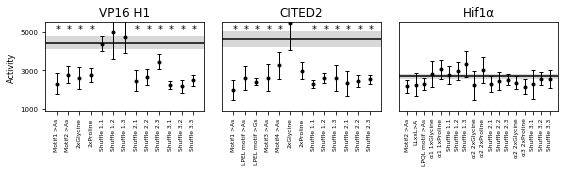

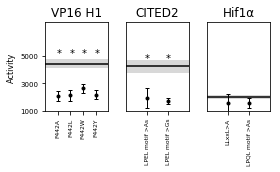

In [15]:
# activities of shuffle mutants for supplement
fig = plt.figure(figsize=(8,2.5))
ymin, ymax = 900,5500

ax = fig.add_subplot(131)
plotTieFighters(vp16,MutList_VP16_helix)
ax.set_ylabel('Activity',fontsize=8)
ax.set_yticks([1000,3000,5000])
ax.set_yticklabels([1000,3000,5000],fontsize=7)
ax.set_ylim(ymin,ymax)
ax = fig.add_subplot(132)
plotTieFighters(cited,MutList_Cited2_helix)
# ax.set_ylabel('Activity',fontsize=8)
ax.set_ylim(ymin,ymax)
ax = fig.add_subplot(133)
plotTieFighters(hif1a,MutList_Hif1a_helix)
# ax.set_ylabel('Activity',fontsize=8)
ax.set_ylim(ymin,ymax)
plt.tight_layout()
plt.savefig('Figures/'+Folder+'FigureSX_Shufflemutants.pdf')
plt.show()

#activities of previously published mutants for supplement.
fig = plt.figure(figsize=(4,2.5))

ax = fig.add_subplot(131)
plotTieFighters(vp16,MutList_VP16_known)
# plt.yticks([-1.5,0,1.5]),
ax.set_ylabel('Activity',fontsize=8)
ax.set_yticks([1000,3000,5000])
ax.set_yticklabels([1000,3000,5000],fontsize=7)
ax.set_title(TitleDict[vp16])
ax = fig.add_subplot(132)
plotTieFighters(cited,MutList_Cited2_known)
ax.set_title(TitleDict[cited])
# ax.set_yticks([1000,3000,5000])
ax = fig.add_subplot(133)
plotTieFighters(hif1a,MutList_Hif1a_known)
ax.set_title(TitleDict[hif1a])
# ax.set_yticks([1000,3000,5000])
plt.tight_layout()
plt.savefig('Figures/'+Folder+'FigureSX_PreviouslyPublished_mutants.pdf')
plt.show()



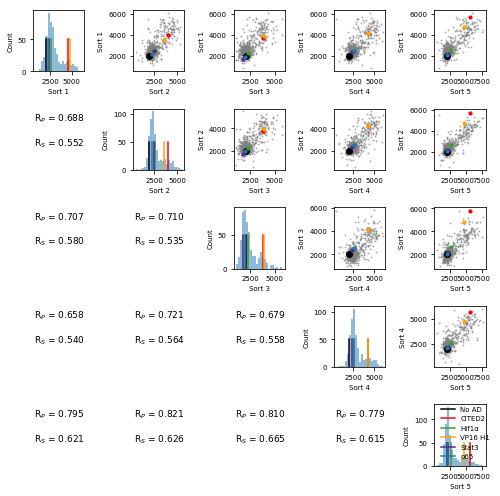

In [16]:
BioReps = ['MSS18_Sort_1AvgADActivityOutliersRemovedAndBCsCollapsed_NormToNoAD',
 'MSS18_Sort_2AvgADActivityOutliersRemovedAndBCsCollapsed_NormToNoAD',
 'MSS18_Sort_3AvgADActivityOutliersRemovedAndBCsCollapsed_NormToNoAD',
 'MSS18_Sort_4AvgADActivityOutliersRemovedAndBCsCollapsed_NormToNoAD',
 'MSS18_Sort_5AvgADActivityOutliersRemovedAndBCsCollapsed_NormToNoAD',
           ]
BioRepsNameDict = dict(zip(BioReps,['Sort1','Sort2','Sort3','Sort4','Sort5']))
ylevel = 50
fig = plt.figure(figsize=(7,7))
for i, replicate in enumerate(BioReps):
    for j, replicate2 in enumerate(BioReps):
#         indx = masterDF[vp16]|masterDF[cited]|masterDF[hif1a]
        tempDF = masterDF#[indx]
        plt.subplot(len(BioReps),len(BioReps),j*len(BioReps)+i+1)
        if i == j:
            plt.xlabel(('Sort %i'%(i+1)),fontsize=7),plt.ylabel('Count',fontsize=7)
            plt.hist(tempDF[replicate],23,alpha=.5)
            plt.plot([2000,2000],[0,ylevel],c='k',label='No AD')
            plt.xticks(fontsize=7),plt.yticks(fontsize=7)
            for ad in ADlist:
                tempDF = masterDF[masterDF[ad]&masterDF.WT]
                wtactivity = tempDF[replicate]
                plt.plot([wtactivity,wtactivity],[0,ylevel],c=ADcolorDict[ad],label=TitleDict[ad])
        if i > j:
#             plt.scatter(masterDF[replicate],masterDF[replicate2],c='gray',alpha=.5,s=1)
            plt.scatter(tempDF[replicate],tempDF[replicate2],c='gray',alpha=.5,s=1)
            plt.scatter(2000,2000,c='k',label='No AD')
            plt.xlabel(('Sort %i'%(i+1))),plt.ylabel('Count')
            for ad in ADlist:
                tempDF = masterDF[masterDF[ad]&masterDF.WT]
                wtactivity = tempDF[replicate]
                plt.scatter(wtactivity,wtactivity,c=ADcolorDict[ad],s=10,label=TitleDict[ad])
            plt.xlabel(('Sort %i'%(i+1)),fontsize=7),plt.ylabel(('Sort %i'%(j+1)),fontsize=7)
            plt.xticks(fontsize=7),plt.yticks(fontsize=7)
        if i < j:
            pear = stats.pearsonr(tempDF[replicate],tempDF[replicate2])
            plt.text(0.02,.8,'R$_P$ = %.3f'%pear[0],fontsize=9)
            spearman = stats.spearmanr(tempDF[replicate],tempDF[replicate2])
            plt.text(0.02,.4,'R$_S$ = %.3f'%spearman[0],fontsize=9)
            plt.xticks([]),plt.yticks([]),plt.axis('OFF')
plt.legend(frameon=False,fontsize=7)
plt.tight_layout()
plt.savefig('Figures/'+Folder+'FigureS1_Reproduciblity_w_controls.pdf')

plt.show()

### Figure 3A charge vs activity

In [17]:
ad = hif1a
# motif locations to highlight in each AD:
MotifLocationsDict = {cited:[2,8,11,23,26,27,28,33,35,36],
                     vp16:[5,9,11,24,27,29,32],
                     hif1a:[1,2,11,14,17,31,32,37,38,41]}

mutantlistfigureSizes ={vp16:2,cited:3,hif1a:3.5}

def plotNegLocations(tempDF,ad,AAset=['D','E','F','W','Y'],color='r',markersize=20,showmotif=False):
    if len(tempDF)>0:
        wt =WTname2seqDict[ad]
        posMatrix = []#np.zeros((len(tempDF),len(wt)))
        for i, entry in tempDF.iterrows():
            tempADseq = entry.ADseq
            temprow = np.zeros(len(wt))
            for j,aa in enumerate(tempADseq):
                if (aa!=wt[j])&(aa in AAset):
                    temprow[j] =1
            posMatrix.append(temprow)
        posMatrix = np.matrix(posMatrix)

        posMatrix = posMatrix.sum(axis=0)/(len(tempDF))
        posMatrix = np.array(posMatrix)
        posMatrix = posMatrix[0]
        Xs = np.arange(len(posMatrix))
        indx = posMatrix>0
        Xs = Xs[indx]
        Xs = Xs+ADCoordinates[ad][0]
        posMatrix2 = posMatrix[indx]
        plt.plot(Xs, posMatrix2,c=color,marker='o')
        
        ymax = .8 #max(posMatrix)
        if showmotif:
            #plot the motif locations
            motiflocs = MotifLocationsDict[ad]
            
            adseq  = WTname2seqDict[ad]
            for pos in motiflocs:
                position = pos +ADCoordinates[ad][0]
                plt.plot([position,position],[0,ymax],alpha=0.3,c='gray',linewidth=5)
                plt.text(position,0,adseq[pos],family='monospace')
        plt.ylim(0,ymax)
def visualize_AA_Changes_v2(AD_DF,WT,plotname,color='r',ypos=0,printWT =False,colname='shortname',printname=True):
    fontsize=7
    localColorDict = {'D':color,'E':color,'A':color,'W':'purple','F':'purple','Y':'purple','L':darkgreen}
    # print WT 
    if printWT ==True:
        for pos, ADaa in enumerate(WT):
            plt.text(pos,ypos, ADaa, color='k',fontsize=fontsize, fontweight='bold', family='monospace')
        ypos+=1
    else: 
        if printname:
            plt.text(0,ypos,plotname,fontsize=fontsize)
            ypos +=1
        # for each variant
        for j,entry in AD_DF.iterrows():
            AD = entry.ADseq
            for pos, ADaa in enumerate(AD):
                if ADaa == WT[pos]:
                    # print AA in black if it is WT
                    plt.text(pos,ypos, ADaa, color='lightgray',fontsize=fontsize, family='monospace')
                else:
                    # print AA in red if it is NOT WT
                    plt.text(pos,ypos, ADaa, color=localColorDict[ADaa],fontsize=fontsize, fontweight='bold', family='monospace')
            plt.text(pos+1,ypos,'%.1f'%entry[currentItem],fontsize=12)
            ypos+=1
    return ypos
# for CITED2, look at seqs that are more negative and what is different about the ones that increase vs decrease activity
def plotwt(ad,Xproperty,color='k'):
    tempWTDF = WTDF[WTDF[ad]==1]
    plt.scatter(tempWTDF[Xproperty],tempWTDF[currentItem],c=color,s=100)
    tempWTmean,tempWTsem = tempWTDF[currentItem].values,tempWTDF[currentSTD].values
    tempDF = masterDF[masterDF[ad]]
    xmin, xmax = min(tempDF[Xproperty]),max(tempDF[Xproperty])
    plt.plot([xmin,xmax],[tempWTmean+tempWTsem,tempWTmean+tempWTsem],c='lightgray')
    plt.plot([xmin,xmax],[tempWTmean-tempWTsem,tempWTmean-tempWTsem],c='lightgray')

def highlightSets(ad,nsigmas=0,useSuperCharge=False):
    def plotWT_wSEM_patch(ad,prop,masterDF=masterDF):
        indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))
        tempDF = masterDF[indx]
        tempWT = WTDF[WTDF.ADseq==WTname2seqDict[ad]]
        plt.scatter(tempWT[prop],tempWT[currentItem],c='k',s=80)
        minX,maxX = min(tempDF[prop]), max(tempDF[prop])
        WTmean, WTsem = WTname2currentItemDict[ad], WTname2currentSTDDict[ad]
        plt.plot([minX,maxX],[WTmean,WTmean],color='k',label='WT Exp Mean')
        WTstdPatch = mpatches.Rectangle((minX,(WTmean-WTsem)),maxX-minX,2*WTsem,alpha=0.3,facecolor='gray')
        ax.add_patch(WTstdPatch)
    
    Xproperty = 'Charge'
    Xproperty2 = 'Aromatics'
    activity = currentItem

    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    plotWT_wSEM_patch(ad,Xproperty,masterDF=masterDF)
    color1,color2,color3 = 'r',darkblue,'#ff7f00' # colors for charge
    color4,color5,color6,color7 =  '#d95f02','#1b9e77','#7570b3','#e7298a' # colors for aromatics
    color8,color9 ='#66a61e','#e6ab02'
    if useSuperCharge:
        indx = (masterDF[ad]==1)&((masterDF[PropertyDict[Xproperty]]==1)|(masterDF.Supercharge==1))
    else:
        indx = (masterDF[ad]==1)&(masterDF[PropertyDict[Xproperty]]==1)
    tempDF = masterDF[indx]
    print 'There are %i variants plotted' % sum(indx)
    plt.errorbar(tempDF[Xproperty],tempDF[activity],yerr=tempDF[currentSTD],fmt='.',capsize=2, elinewidth=1,c='gray',alpha=.3)
#     sns.regplot(x=Xproperty,y=activity,data=tempDF,color='gray',robust=True) 

    tempWTDF = WTDF[WTDF[ad]==1]
    Chargethresh = tempWTDF[Xproperty]
    ActivitySTD = tempWTDF[currentSTD]
    Activitythresh = tempWTDF[activity]+ActivitySTD*nsigmas


    # more acidic more active
    indx1 = (tempDF.Charge < Chargethresh[0]) &(tempDF[activity] > Activitythresh[0])
    tempDF1 = tempDF[indx1]
    tempDF1 = tempDF1.sort_values(by=activity,ascending=0)
    plt.scatter(tempDF1[Xproperty],tempDF1[activity],c=color1)

    # more acidic less active
    indx2 = (tempDF.Charge < Chargethresh[0]) & (tempDF[activity] < Activitythresh[0])
    tempDF2 = tempDF[indx2]
    tempDF2 = tempDF2.sort_values(by=activity,ascending=0)
    plt.scatter(tempDF2[Xproperty],tempDF2[activity],c=color2)

    plt.title(TitleDict[ad]),plt.ylim(minActivity,maxActivity)
    plt.ylabel('Activity'),plt.xlabel('Net charge')
    plt.savefig('Figures/'+Folder+'Activity_vs_'+Xproperty+ad+'.pdf')
    plt.show()


    fig3, axes = plt.subplots( figsize=(4,mutantlistfigureSizes[ad]))
    yposition =0
    plotName =  TitleDict[ad]+' more acidic and more active'
    yposition = visualize_AA_Changes_v2(tempDF1,WTname2seqDict[ad],plotName,color1,yposition,printname=False)
    yposition = visualize_AA_Changes_v2(tempDF1,WTname2seqDict[ad],plotName,color1,yposition,printWT=True,printname=False)
    plotName = TitleDict[ad]+' more acidic and less active'
    yposition = visualize_AA_Changes_v2(tempDF2,WTname2seqDict[ad],plotName,color2,yposition,printname=False)
    plt.axis([-1, len(WTname2seqDict[ad])+12, yposition,-1]),    plt.xticks([]),plt.yticks([])
    plt.tight_layout()
    plt.savefig('Figures/'+Folder+'ShowPositions_'+Xproperty+ad+'.pdf')
    plt.show()
    
    #summerize locations of negatives charges
    fig3, axes = plt.subplots( figsize=(3.625,2))
    plotNegLocations(tempDF1,ad,AAset=['D','E','A','W','F'],color=color1,showmotif=True)
    plotNegLocations(tempDF2,ad,AAset=['D','E','A','W','F'],color=color2)
    plt.ylabel('Fraction of sequences with a substitution'),plt.xlabel('Position'),#plt.title(ad)
    plt.savefig('Figures/'+Folder+'SummarizeNegPositions_'+Xproperty+ad+'.pdf')

    plt.show()
PropertyDict ={'Charge':'PerturbCharge','NCPR':'PerturbCharge',
               'Aromatics':'PerturbAromatics','CountFYWL':'PerturbAromatics'}
currentItemLabel = {'Activity_Mean_MSS18':'Activity','Zscore_Mean_MSS18':'Activity (Z score)'}
currentItemYticks = {'Activity_Mean_MSS18':[1000,2000,3000,4000,5000],'Zscore_Mean_MSS18':[-1,0,1,2]}
propertyXlabls = {'Charge':'Net Charge','NCPR':'Net Charge Per Residue','CountFYWL':'Number of W,F,Y,L','Aromatics':'Aromatics'}
SigDiffDict ={'Zscore_Mean_MSS18':'SigDiff_Zscore','Activity_Mean_MSS18':'SigDiff_NormToNoAD'}
WTaromaticDict ={'vp16N_C':1, 'CITED2_N':4, 'Hif1-AD2_46':1}

def plotWT_wSEM_patch(ad,activity,prop,masterDF=masterDF):
        indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))
        tempDF = masterDF[indx]
        tempWT = WTDF[WTDF.ADseq==WTname2seqDict[ad]]
        plt.scatter(tempWT[prop],tempWT[activity],c='k',s=80)
        minX,maxX = min(tempDF[prop]), max(tempDF[prop])
        WTmean, WTsem = WTname2currentItemDict[ad], WTname2currentSTDDict[ad]
        plt.plot([minX,maxX],[WTmean,WTmean],color='k',label='WT Exp Mean')
        WTstdPatch = mpatches.Rectangle((minX,(WTmean-WTsem)),maxX-minX,2*WTsem,alpha=0.3,facecolor='gray')
        ax.add_patch(WTstdPatch)
        
def plotActivityvsProp(ad,prop,masterDF=masterDF,color=darkblue,highlightSigDiff=False):

    activity = currentItem
    Ntall = 3
    Nwide = 3

#     fig = plt.figure(figsize=(8,3))
#     if prop =='Aromatics':
#         indx = (masterDF[ad]==1)&(masterDF.Aromatics !=WTaromaticDict[ad])
#     else:
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))
    tempDF = masterDF[indx]
    plt.errorbar(tempDF[prop],tempDF[activity],yerr=tempDF[currentSTD],fmt='.',capsize=2, elinewidth=1,c=color)
    print 'There are %i variants plotted '% sum(indx)
#     if prop=='Charge':
#         sns.regplot(x=prop,y=activity,data=tempDF,color=color, fit_reg=True,robust=True)#,x_jitter=.4) 
    #plot WT
    tempWT = WTDF[WTDF.ADseq==WTname2seqDict[ad]]
    plt.scatter(tempWT[prop],tempWT[activity],c='k',s=80)
    minX,maxX = min(tempDF[prop]), max(tempDF[prop])
    WTmean, WTsem = WTname2currentItemDict[ad], WTname2currentSTDDict[ad]
    plt.plot([minX,maxX],[WTmean,WTmean],color='k',label='WT Exp Mean')
    WTstdPatch = mpatches.Rectangle((minX,(WTmean-WTsem)),maxX-minX,2*WTsem,alpha=0.3,facecolor='gray')
    ax.add_patch(WTstdPatch)

    # plot statistically significant different points in another color
    if highlightSigDiff:
        indx = (masterDF[ad]==1)&((masterDF.PerturbCharge==1))&(masterDF[SigDiffDict[currentItem]])
        if sum(indx)>0:
            tempDF = masterDF[indx]
            plt.scatter(tempDF[prop],tempDF[activity],c='red')
    #rescale y axis
    plt.ylim(minActivity,maxActivity),plt.xlabel(propertyXlabls[prop],fontproperties=font)

    plt.ylabel(''),plt.yticks([])
    if prop =='Charge':
        plt.title(TitleDict[ad],fontproperties=font) 
        ax.set_xlabel('Net Charge',fontsize=7)
        ax.set_xticks([-10,0,10])
        ax.set_xticklabels([-10,0,10],fontsize=6)
    elif prop =='Aromatics':
        ax.set_xlabel('Aromatics',fontsize=7)
        ax.set_xticks([0,5,10,15])
        ax.set_xticklabels([0,5,10,15],fontsize=6)
    elif prop =='CountFYWL':
        ax.set_xlabel('W,F,Y,L Count',fontsize=7)
        ax.set_xticks([5,10,15])
        ax.set_xticklabels([5,10,15],fontsize=6)

There are 53 variants plotted
CITED2_N
8.53434668903e-11
There are 53 variants plotted
Hif1-AD2_46
0.000397724859931
There are 31 variants plotted
vp16N_C
0.00129303996512


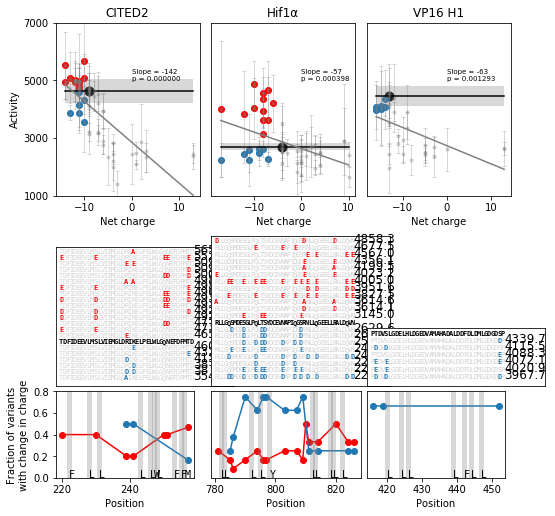

In [18]:
def plotWT_wSEM_patch(ad,prop,masterDF=masterDF):
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))
    tempDF = masterDF[indx]
    tempWT = WTDF[WTDF.ADseq==WTname2seqDict[ad]]
    plt.scatter(tempWT[prop],tempWT[currentItem],c='k',s=80)
    minX,maxX = min(tempDF[prop]), max(tempDF[prop])
    WTmean, WTsem = WTname2currentItemDict[ad], WTname2currentSTDDict[ad]
    plt.plot([minX,maxX],[WTmean,WTmean],color='k',label='WT Exp Mean')
    WTstdPatch = mpatches.Rectangle((minX,(WTmean-WTsem)),maxX-minX,2*WTsem,alpha=0.3,facecolor='gray')
    ax.add_patch(WTstdPatch)
def visualize_AA_Changes_v3(AD_DF,WT,plotname,color='r',ypos=0,printWT =False,colname='shortname',printname=True):
    fontsize=6
    # print WT 
    if printWT ==True:
        for pos, ADaa in enumerate(WT):
            plt.text(pos,ypos, ADaa, color='k',fontsize=fontsize, fontweight='bold', family='monospace')
        ypos+=1        
        # for each variant
    for j,entry in AD_DF.iterrows():
        AD = entry.ADseq
        for pos, ADaa in enumerate(AD):
            if ADaa == WT[pos]:
                # print AA in gray if it is WT
                plt.text(pos,ypos, ADaa, color='lightgray',fontsize=fontsize, family='monospace')
            else:
                # print AA in color if it is NOT WT
                plt.text(pos,ypos, ADaa, color=color,fontsize=fontsize, fontweight='bold', family='monospace')
        ypos+=1
    return ypos

Xproperty = 'Charge'

activity = currentItem
#colors
color1,color2,color3 = 'r',darkblue,'#ff7f00' # colors for charge



#plot dimentions
left, width = 0.1, 0.25
bottom, height = 0.05, 0.3
spacing = 0.07
horizontalspacing = 0.02
middlecorrection =.09
ytickset = [1000,3000,5000,7000]
fig = plt.figure(figsize=(8,8))
toppanelheight = .54
   

for k, ad in enumerate(ADlist[:3]):
    indx = (masterDF[ad]==1)&(masterDF[PropertyDict[Xproperty]]==1)
    # plot Charge
    ax = fig.add_axes([left+k*width+k*horizontalspacing,toppanelheight,width,height])

    plotWT_wSEM_patch(ad,Xproperty,masterDF=masterDF)
    tempDF = masterDF[indx]
    X = tempDF[Xproperty]
    Y = tempDF[activity]
    plt.errorbar(X,Y,yerr=tempDF[currentSTD],fmt='.',capsize=2, elinewidth=1,c='gray',alpha=.3)
    print 'There are %i variants plotted' % sum(indx)
#     sns.regplot(x=Xproperty,y=activity,data=tempDF,color='gray',ci=False) 
    #compute regression
    X = statsmodels.api.add_constant(X)
    mod = statsmodels.api.OLS(Y,X)
    reg = mod.fit()
    params = reg.params
    pvalues =reg.pvalues
    print ad
    print pvalues[1]
    plt.text(0,5000,'Slope = %.0f \np = %f'%(params[1],pvalues[1]),fontsize=7)
    X = tempDF[Xproperty]
    my_xs = [min(X),max(X)] #np.linspace(min(X),max(X),10)
    my_ys = [params[1]*min(X)+params[0],params[1]*max(X)+params[0]]#params[1]*my_xs#+params[0]
    plt.plot(my_xs,my_ys,c='gray')
    plt.ylim([1000,7000])

    
    tempWTDF = WTDF[WTDF[ad]==1]
    Chargethresh = tempWTDF[Xproperty]
    ActivitySTD = tempWTDF[currentSTD]
    Activitythresh = tempWTDF[activity]

    # more acidic more active
    indx1 = (tempDF.Charge < Chargethresh[0]) &(tempDF[activity] > Activitythresh[0])
    tempDF1 = tempDF[indx1]
    tempDF1 = tempDF1.sort_values(by=activity,ascending=0)
    plt.scatter(tempDF1[Xproperty],tempDF1[activity],c=color1)

    # more acidic less active
    indx2 = (tempDF.Charge < Chargethresh[0]) & (tempDF[activity] < Activitythresh[0])
    tempDF2 = tempDF[indx2]
    tempDF2 = tempDF2.sort_values(by=activity,ascending=0)
    plt.scatter(tempDF2[Xproperty],tempDF2[activity],c=color2)
    plt.title(TitleDict[ad]),plt.ylim(minActivity,maxActivity)
    if k ==0:
        plt.ylabel('Activity'),plt.yticks(ytickset)
    else:
        plt.yticks([])
    plt.xlabel('Net charge')
    plt.ylim([1000,7000])


    heightdict ={hif1a: .26,vp16:.1 , cited:.24} 
    ax = fig.add_axes([left+k*width+k*horizontalspacing,.21,.31,heightdict[ad]])
    yposition =0
    plotName =  TitleDict[ad]
    yposition = visualize_AA_Changes_v2(tempDF1,WTname2seqDict[ad],plotName,color1,yposition,printname=False)
    yposition = visualize_AA_Changes_v2(tempDF1,WTname2seqDict[ad],plotName,color1,yposition,printWT=True,printname=False)
    yposition = visualize_AA_Changes_v2(tempDF2,WTname2seqDict[ad],plotName,color2,yposition,printname=False)
    plt.axis([-1, len(WTname2seqDict[ad])+12, yposition,-1]),    plt.xticks([]),plt.yticks([])

    widthdict = {hif1a: .26,vp16:.24 , cited:.24}
    #summerize locations of negatives charges
    ax = fig.add_axes([left+k*width+k*horizontalspacing,bottom,widthdict[ad],.15])
    plotNegLocations(tempDF1,ad,AAset=['D','E','A'],color=color1)
    plotNegLocations(tempDF2,ad,AAset=['D','E','A'],color=color2,showmotif=True)
    if k ==0:
        plt.ylabel('Fraction of variants\nwith change in charge'),
    else:
        plt.yticks([])
    plt.xlabel('Position'),#plt.title(ad)

    
    ##################################################### 
    

plt.savefig('Figures/'+Folder+'Figure3_Charge_3ADs.pdf')
plt.show()


# Charge, not AA identity, is the key parameter

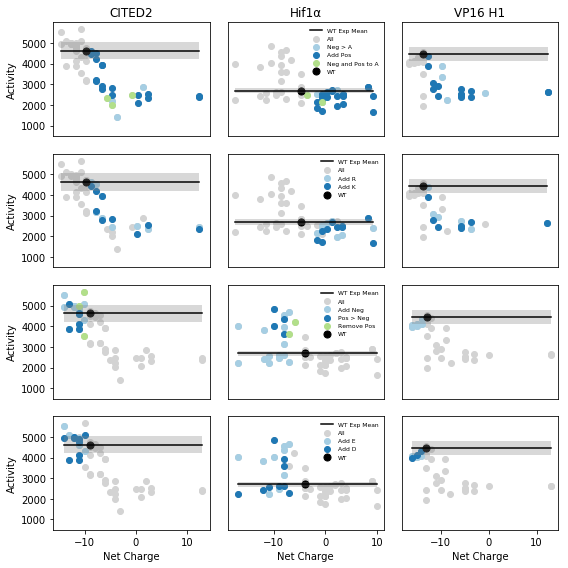

In [35]:

minActivity,maxActivity = [500,6000]

temp1 = masterDF.apply(lambda row: '>R' in row['shortname'],axis=1)
temp2 = masterDF.apply(lambda row: '>K' in row['shortname'],axis=1)
masterDF['AddPos']= temp1 |temp2
temp1 = masterDF.apply(lambda row: '>E' in row['shortname'],axis=1)
temp2 = masterDF.apply(lambda row: '>D' in row['shortname'],axis=1)
masterDF['AddNeg']= temp1 |temp2
temp1 = masterDF.apply(lambda row: 'D>A' in row['shortname'],axis=1)
temp2 = masterDF.apply(lambda row: 'E>A' in row['shortname'],axis=1)
masterDF['Neg2A']= temp1 |temp2
temp3 = masterDF.apply(lambda row: 'R>A' in row['shortname'],axis=1)
temp4 = masterDF.apply(lambda row: 'K>A' in row['shortname'],axis=1)
masterDF['Pos2A']= (temp3|temp4)
temp5 = masterDF.apply(lambda row: 'EDKR>A' in row['shortname'],axis=1)
masterDF['RemoveNegAndPos']= temp5



color1=lightblue
color2=darkblue
color3=lightgreen
prop='Charge'
activity = currentItem
fig = plt.figure(figsize=(8,8))
Ntall,Nwide =4,3

def plotWT(ad):
    tempWT = WTDF[WTDF.ADseq==WTname2seqDict[ad]] # find WT
    plt.scatter(tempWT[prop],tempWT[activity],c='k',s=50,label='WT')
    WTmean, WTsem = WTname2currentItemDict[ad], WTname2currentSTDDict[ad]
    plt.plot([minX,maxX],[WTmean,WTmean],color='k',label='WT Exp Mean')
    WTstdPatch = mpatches.Rectangle((minX,(WTmean-WTsem)),maxX-minX,2*WTsem,alpha=0.3,facecolor='gray')
    ax.add_patch(WTstdPatch)
def fixyaxis(i):
    plt.ylim(minActivity,maxActivity),plt.xticks([])
    if i ==0:
        plt.ylabel('Activity'),plt.yticks(currentItemYticks[currentItem])
    else:
        plt.ylabel(''),plt.yticks([])
    if i ==1:
        plt.legend(fontsize=6,frameon=False,loc='upper right')


# removing negatives is similar to adding positives
for i,ad in enumerate(ADlist[:3]):
    ax = fig.add_subplot(Ntall,Nwide,1+i)
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))
    tempDF = masterDF[indx]
    minX,maxX = min(tempDF[prop]), max(tempDF[prop])
#         ax.errorbar(tempDF[prop],tempDF[activity],yerr=tempDF[currentSTD],fmt='.',linewidth=0,markeredgewidth=1.0,fillstyle='full',markersize=0, capsize=2, elinewidth=1,c='lightgray',alpha=.8)       
#         sns.regplot(x=prop,y=activity,data=tempDF,color='gray',marker='.', fit_reg=True) 
    tempWT = WTDF[WTDF.ADseq==WTname2seqDict[ad]] # find WT
    #plot all
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))#&(masterDF[prop]==tempWT[prop][0])
    tempDF = masterDF[indx]
    plt.scatter(tempDF[prop],tempDF[activity],c='lightgray',marker='o',label='All')

    # find set 1
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))&(masterDF[prop]>tempWT[prop][0])&masterDF.Neg2A
    tempDF = masterDF[indx]
    ax.scatter(tempDF[prop],tempDF[activity],c=color1,label='Neg > A')
    # find set 2
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))&(masterDF[prop]>tempWT[prop][0])&masterDF.AddPos
    tempDF = masterDF[indx]
    ax.scatter(tempDF[prop],tempDF[activity],c=color2,label='Add Pos')
    # find set 3
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))&(masterDF[prop]>tempWT[prop][0])&masterDF.RemoveNegAndPos
    tempDF = masterDF[indx]
    plt.scatter(tempDF[prop],tempDF[activity],c=color3,label='Neg and Pos to A')
    #plot WT
    plotWT(ad)
    
    #rescale y axis
    fixyaxis(i)
    plt.title(TitleDict[ad])
    

# adding R is similar to adding K
temp1 = masterDF.apply(lambda row: '>R' in row['shortname'],axis=1)
masterDF['AddRs']= temp1
temp2 = masterDF.apply(lambda row: '>K' in row['shortname'],axis=1)
masterDF['AddKs']= temp2

for i,ad in enumerate(ADlist[:3]):
    ax = fig.add_subplot(Ntall,Nwide,4+i)
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))
    tempDF = masterDF[indx]
    tempWT = WTDF[WTDF.ADseq==WTname2seqDict[ad]] # find WT

    minX,maxX = min(tempDF[prop]), max(tempDF[prop])
#         ax.errorbar(tempDF[prop],tempDF[activity],yerr=tempDF[currentSTD],fmt='.',linewidth=0,markeredgewidth=1.0,fillstyle='full',markersize=0, capsize=2, elinewidth=1,c='lightgray',alpha=.8)       
#         sns.regplot(x=prop,y=activity,data=tempDF,color='gray',marker='.', fit_reg=True) 
    #plot all
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))#&(masterDF[prop]==tempWT[prop][0])
    tempDF = masterDF[indx]
    plt.scatter(tempDF[prop],tempDF[activity],c='lightgray',marker='o',label='All')


    # find set 1
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))&(masterDF[prop]>tempWT[prop][0])&masterDF.AddRs
    tempDF = masterDF[indx]
    ax.scatter(tempDF[prop],tempDF[activity],c=color1,label='Add R')
    # find set 2
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))&(masterDF[prop]>tempWT[prop][0])&masterDF.AddKs
    tempDF = masterDF[indx]
    ax.scatter(tempDF[prop],tempDF[activity],c=color2,label='Add K')

    #plot WT
    plotWT(ad)
    #rescale y axis
    fixyaxis(i)


# adding negatives is similar to removing positives
temp1 = masterDF.apply(lambda row: '>E' in row['shortname'],axis=1)
temp2 = masterDF.apply(lambda row: '>D' in row['shortname'],axis=1)
masterDF['AddNeg']= temp1 |temp2
temp1 = masterDF.apply(lambda row: 'K>E' in row['shortname'],axis=1)
temp2 = masterDF.apply(lambda row: 'K>D' in row['shortname'],axis=1)
temp3 = masterDF.apply(lambda row: 'R>E' in row['shortname'],axis=1)
temp4 = masterDF.apply(lambda row: 'R>D' in row['shortname'],axis=1)

masterDF['Pos2Neg']= temp1 |temp2 |temp3 |temp4
temp1 = masterDF.apply(lambda row: 'R>A' in row['shortname'],axis=1)
temp2 = masterDF.apply(lambda row: 'K>A' in row['shortname'],axis=1)
masterDF['RemovePos']= temp1 |temp2

color1=lightblue
color2=darkblue
color3=lightgreen
for i,ad in enumerate(ADlist[:3]):
    ax = fig.add_subplot(Ntall,Nwide,7+i)
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))
    tempDF = masterDF[indx]
    tempWT = WTDF[WTDF.ADseq==WTname2seqDict[ad]] # find WT

    minX,maxX = min(tempDF[prop]), max(tempDF[prop])
    #plot all
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))#&(masterDF[prop]==tempWT[prop][0])
    tempDF = masterDF[indx]
    plt.scatter(tempDF[prop],tempDF[activity],c='lightgray',marker='o',label='All')

    # find set 1
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))&(masterDF[prop]<tempWT[prop][0])&masterDF.AddNeg
    tempDF = masterDF[indx]
    ax.scatter(tempDF[prop],tempDF[activity],c=color1,label='Add Neg')
    # find set 2
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))&(masterDF[prop]<tempWT[prop][0])&masterDF.Pos2Neg
    tempDF = masterDF[indx]
    ax.scatter(tempDF[prop],tempDF[activity],c=color2,label='Pos > Neg')
    # find set 3
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))&(masterDF[prop]<tempWT[prop][0])&masterDF.RemovePos
    tempDF = masterDF[indx]
    plt.scatter(tempDF[prop],tempDF[activity],c=color3, label='Remove Pos')
    #plot WT
    plotWT(ad)
    #rescale y axis
    fixyaxis(i)


# Adding D or E is similar
temp1 = masterDF.apply(lambda row: '>E' in row['shortname'],axis=1)
masterDF['AddE']= temp1 
temp1 = masterDF.apply(lambda row: '>D' in row['shortname'],axis=1)
masterDF['AddD']= temp1 

color1=lightblue
color2=darkblue
color3=lightgreen

for i,ad in enumerate(ADlist[:3]):
    ax = fig.add_subplot(Ntall,Nwide,10+i)
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))
    tempDF = masterDF[indx]
    tempWT = WTDF[WTDF.ADseq==WTname2seqDict[ad]] # find WT

    minX,maxX = min(tempDF[prop]), max(tempDF[prop])

    #plot all
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))#&(masterDF[prop]==tempWT[prop][0])
    tempDF = masterDF[indx]
    plt.scatter(tempDF[prop],tempDF[activity],c='lightgray',marker='o',label='All')

    # find set 1
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))&(masterDF[prop]<tempWT[prop][0])&masterDF.AddE
    tempDF = masterDF[indx]
    ax.scatter(tempDF[prop],tempDF[activity],c=color1,label='Add E')
#         print tempDF.shortname
    # find set 2
    indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))&(masterDF[prop]<tempWT[prop][0])&masterDF.AddD
    tempDF = masterDF[indx]
    ax.scatter(tempDF[prop],tempDF[activity],c=color2,label='Add D')
    #plot WT
    plotWT(ad)
    #rescale y axis
    fixyaxis(i)
    plt.xlabel(propertyXlabls[prop])
    plt.xticks([-10,0,10])
    plt.tight_layout()
    plt.savefig('Figures/'+Folder+'NetChargeNotIdentify.pdf')

plt.show()

In [32]:
a = masterDF[ masterDF['RemoveNegAndPos']]
a.shortname

ADseq
ALLGQSMAASGLPQLTSYACAVNAPIQGSANLLQGAALLAALAQVN             EDKR>A
RLLGQSMDESGLPQLTSYDCEVNAPIQGSANLLQGAALLAALAQVN    EDKR>Amut29to46
SNTIALPMSPATLASLMQFGNNGAGAAPSAGGQFASLTFAMALTSA             EDKR>A
SNTIALPMSPATLASLMQFGNNGEGAEPSAGGQFESLTFDMELTSE     EDKR>Amut0to23
TAFIAAAVLMSLVIAMGLAAIAALPALWLGQNAFAFMTA                    EDKR>A
TAFIAAAVLMSLVIAMGLAAIKELPELWLGQNEFDFMTD            EDKR>Amut0to20
TDFIDEEVLMSLVIEMGLDRIAALPALWLGQNAFAFMTA           EDKR>Amut20to39
Name: shortname, dtype: object

In [21]:
sum(masterDF['Neg2A'])

16

# Figure 4 Activity vs aromatics or WFYL

There are 40 variants plotted 
There are 28 variants plotted 
There are 22 variants plotted 
There are 40 variants plotted 
There are 28 variants plotted 
There are 22 variants plotted 


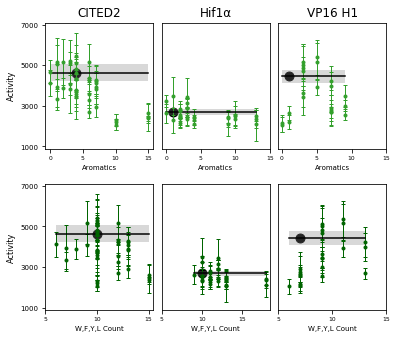

In [16]:
# definitions forthe axes
left, width = 0.1, 0.25
bottom, height = 0, 0.25
spacing = 0.07
horizontalspacing = 0.02
middlecorrection =.09
ytickset = [1000,3000,5000,7000]
fig = plt.figure(figsize=(6,7))
ymin, ymax = 900,7100

# ax = fig.add_axes([left,bottom+height*2+spacing*3,width,height])
# plotActivityvsProp(cited,prop ='Charge')
# ax.set_ylabel('Activity',fontsize=8)
# ax.set_yticks(ytickset)
# ax.set_yticklabels(ytickset,fontsize=7)
# ax.set_ylim(ymin,ymax)
# ax = fig.add_axes([left+width+horizontalspacing,bottom+height*2+spacing*3,width,height])
# plotActivityvsProp(hif1a,prop ='Charge')
# ax.set_ylim(ymin,ymax)
# ax = fig.add_axes([left+width*2+horizontalspacing*2,bottom+height*2+spacing*3,width,height])
# plotActivityvsProp(vp16,prop ='Charge')
# ax.set_ylim(ymin,ymax)


ax = fig.add_axes([left,bottom+height+spacing*2,width,height])
plotActivityvsProp(cited,prop ='Aromatics',color=darkgreen)
plt.title(TitleDict[cited])
ax.set_ylabel('Activity',fontsize=8)
ax.set_yticks(ytickset)
ax.set_yticklabels(ytickset,fontsize=7)
ax.set_ylim(ymin,ymax)
ax = fig.add_axes([left+width+horizontalspacing,bottom+height+spacing*2,width,height])
plotActivityvsProp(hif1a,prop ='Aromatics',color=darkgreen)
plt.title(TitleDict[hif1a])
ax.set_ylim(ymin,ymax)
ax = fig.add_axes([left+width*2+horizontalspacing*2,bottom+height+spacing*2,width,height])
plotActivityvsProp(vp16,prop ='Aromatics',color=darkgreen)
plt.title(TitleDict[vp16])
ax.set_ylim(ymin,ymax)

ax = fig.add_axes([left,bottom+spacing,width,height])
plotActivityvsProp(cited,prop ='CountFYWL',color='darkgreen')
ax.set_ylabel('Activity',fontsize=8)
ax.set_yticks(ytickset)
ax.set_yticklabels(ytickset,fontsize=7)
ax.set_ylim(ymin,ymax)
ax = fig.add_axes([left+width+horizontalspacing,bottom+spacing,width,height])
plotActivityvsProp(hif1a,prop ='CountFYWL',color='darkgreen')
ax.set_ylim(ymin,ymax)
ax = fig.add_axes([left+width*2+horizontalspacing*2,bottom+spacing,width,height])
plotActivityvsProp(vp16,prop ='CountFYWL',color='darkgreen')
ax.set_ylim(ymin,ymax)

plt.savefig('Figures/'+Folder+'Figure4_Aromatics_WFYL.pdf')

plt.show()

### Supp Fig of locations of Aromatic substitutions

CITED2_N
1.29982998551e-06
Hif1-AD2_46
0.0244262018926
vp16N_C
0.879107139991


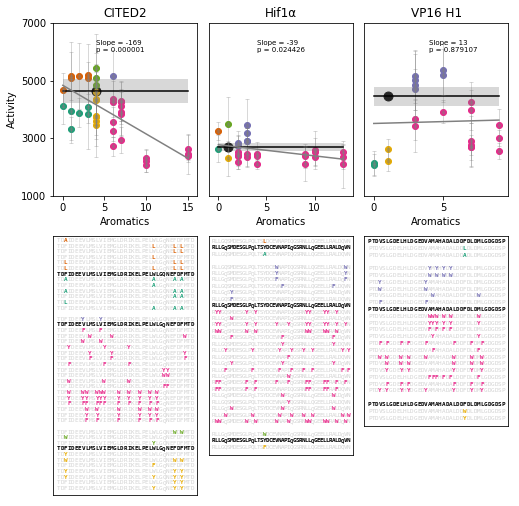

In [17]:

def visualize_AA_Changes_v3(AD_DF,WT,plotname,color='r',ypos=0,printWT =False,colname='shortname',printname=True):
    fontsize=6
    # print WT 
    if printWT ==True:
        for pos, ADaa in enumerate(WT):
            plt.text(pos,ypos, ADaa, color='k',fontsize=fontsize, fontweight='bold', family='monospace')
        ypos+=1        
        # for each variant
    for j,entry in AD_DF.iterrows():
        AD = entry.ADseq
        for pos, ADaa in enumerate(AD):
            if ADaa == WT[pos]:
                # print AA in gray if it is WT
                plt.text(pos,ypos, ADaa, color='lightgray',fontsize=fontsize, family='monospace')
            else:
                # print AA in color if it is NOT WT
                plt.text(pos,ypos, ADaa, color=color,fontsize=fontsize, fontweight='bold', family='monospace')
#         plt.text(pos+1,ypos,'%.1f'%entry[currentItem],fontsize=12) #for making sure the dataframes are all sorted in same order
        ypos+=1
    return ypos

Xproperty = 'Aromatics'
Xproperty2 = 'Aromatics'


activity = currentItem
#colors
color4,color5,color6,color7 =  '#d95f02','#1b9e77','#7570b3','#e7298a' # colors for aromatics
color8,color9 ='#66a61e','#e6ab02'



#plot dimentions
left, width = 0.1, 0.25
bottom, height = 0.05, 0.3
spacing = 0.07
horizontalspacing = 0.02
middlecorrection =.09
ytickset = [1000,3000,5000,7000]
fig = plt.figure(figsize=(8,8))
toppanelheight = .6
   

for k, ad in enumerate(ADlist[:3]):
    indx = (masterDF[ad]==1)&(masterDF[PropertyDict[Xproperty2]]==1)
    # plot Charge
    ax = fig.add_axes([left+k*width+k*horizontalspacing,toppanelheight,width,height])

    plotWT_wSEM_patch(ad,Xproperty,masterDF=masterDF)
    tempDF = masterDF[indx]
    X = tempDF[Xproperty2]
    Y = tempDF[activity]
    plt.errorbar(X,Y,yerr=tempDF[currentSTD],fmt='.',capsize=2, elinewidth=1,c='gray',alpha=.3)
#     sns.regplot(x=Xproperty,y=activity,data=tempDF,color='gray',ci=False) 
    #compute regression
    X = statsmodels.api.add_constant(X)
    mod = statsmodels.api.OLS(Y,X)
    reg = mod.fit()
    params = reg.params
    pvalues =reg.pvalues
    print ad
    print pvalues[1]
    plt.text(4,6000,'Slope = %.0f \np = %f'%(params[1],pvalues[1]),fontsize=7)
    X = tempDF[Xproperty]
    my_xs = [min(X),max(X)] #np.linspace(min(X),max(X),10)
    my_ys = [params[1]*min(X)+params[0],params[1]*max(X)+params[0]]#params[1]*my_xs#+params[0]
    plt.plot(my_xs,my_ys,c='gray')
    plt.ylim([1000,7000])

    
    tempWTDF = WTDF[WTDF[ad]==1]
    Propthresh = tempWTDF[Xproperty2]
    ActivitySTD = tempWTDF[currentSTD]
    Activitythresh = tempWTDF[activity]

    ## fewer aromoatics
    #more active than WT
    indx1 = (tempDF[Xproperty2] < Propthresh[0]) &(tempDF[activity] > Activitythresh[0])
    tempDF1 = tempDF[indx1]
    tempDF1 = tempDF1.sort_values(by=activity,ascending=0)
    plt.scatter(tempDF1[Xproperty2],tempDF1[activity],c=color4)
    # less active than WT
    indx2 = (tempDF[Xproperty2] < Propthresh[0]) &(tempDF[activity] < Activitythresh[0])
    tempDF2 = tempDF[indx2]
    tempDF2 = tempDF2.sort_values(by=activity,ascending=0) 
    plt.scatter(tempDF2[Xproperty2],tempDF2[activity],c=color5)
    
    ## more aromatics
    #more active than WT
    indx3 = (tempDF[Xproperty2] > Propthresh[0]) &(tempDF[activity] > Activitythresh[0])
    tempDF3 = tempDF[indx3]
    tempDF3 = tempDF3.sort_values(by=activity,ascending=0)
    plt.scatter(tempDF3[Xproperty2],tempDF3[activity],c=color6)
    # less active than WT
    indx4 = (tempDF[Xproperty2] > Propthresh[0]) &(tempDF[activity] < Activitythresh[0])
    tempDF4 = tempDF[indx4]
    tempDF4 = tempDF4.sort_values(by=activity,ascending=0)
    plt.scatter(tempDF4[Xproperty2],tempDF4[activity],c=color7)
    
    ## exchange aromatics
    #more active than WT
    indx5 = (tempDF[Xproperty2] == Propthresh[0]) &(tempDF[activity] > Activitythresh[0])
    tempDF5 = tempDF[indx5]
    tempDF5 = tempDF5.sort_values(by=activity,ascending=0)
    plt.scatter(tempDF5[Xproperty2],tempDF5[activity],c=color8)
    # less active than WT
    indx6 = (tempDF[Xproperty2] == Propthresh[0]) &(tempDF[activity] < Activitythresh[0])
    tempDF6 = tempDF[indx6]
    tempDF6 = tempDF6.sort_values(by=activity,ascending=0)
    plt.scatter(tempDF6[Xproperty2],tempDF6[activity],c=color9)

    
    #fix plot
    plt.title(TitleDict[ad])
    if k ==0:
        plt.ylabel('Activity'),plt.yticks(ytickset)
    else:
        plt.yticks([])
    plt.xlabel(Xproperty)
    plt.ylim([1000,7000])

    
    heightdict ={hif1a: .38,vp16:.33 , cited:.45} 
    ax = fig.add_axes([left+k*width+k*horizontalspacing,bottom+.48-heightdict[ad],width,heightdict[ad]])
    yposition =0
    plotName =  TitleDict[ad]
    #fewer aromatics
    yposition = visualize_AA_Changes_v3(tempDF1,WTname2seqDict[ad],plotName,color4,yposition,printname=False)
    yposition = visualize_AA_Changes_v3(tempDF2,WTname2seqDict[ad],plotName,color5,yposition,printWT=True,printname=False)
    #more aromatics
    yposition = visualize_AA_Changes_v3(tempDF3,WTname2seqDict[ad],plotName,color6,yposition+1,printname=False)
    yposition = visualize_AA_Changes_v3(tempDF4,WTname2seqDict[ad],plotName,color7,yposition,printWT=True,printname=False)
    #exchange aromatics
    yposition = visualize_AA_Changes_v3(tempDF5,WTname2seqDict[ad],plotName,color8,yposition+1,printname=False)
    yposition = visualize_AA_Changes_v3(tempDF6,WTname2seqDict[ad],plotName,color9,yposition,printWT=True,printname=False)

    plt.axis([-1, len(WTname2seqDict[ad])+1, yposition,-1]),    plt.xticks([]),plt.yticks([])
  
    
    ##################################################### 
    

plt.savefig('Figures/'+Folder+'FigureSx_Aromatics_3ADs.pdf')
plt.show()



CITED2_N
R2 = 0.195022 
('parameters ', array([ 2546.94231217,  -131.91260374]))
('p values ', array([  1.93139397e-95,   2.55208508e-29]))

Hif1-AD2_46
R2 = 0.089019 
('parameters ', array([ 2306.83687762,   -56.1574361 ]))
('p values ', array([  2.78080424e-214,   5.61297322e-013]))

vp16N_C
R2 = 0.085850 
('parameters ', array([ 2511.12689869,   -65.8935911 ]))
('p values ', array([  1.17028331e-51,   1.16853504e-08]))

stat3
R2 = 0.003119 
('parameters ', array([ 2244.9536636 ,    -4.81199882]))
('p values ', array([  9.85280664e-289,   1.88948435e-001]))

p65
R2 = 0.002863 
('parameters ', array([ 2224.71952705,    -6.47832726]))
('p values ', array([  4.13980629e-284,   2.18790711e-001]))
slope	p value
-131.9	2.55208507676e-29
-56.2	5.61297322189e-13
-65.9	1.16853503706e-08
-4.8	0.188948435312
-6.5	0.218790711275


CITED2_N
R2 = 0.051965 
('parameters ', array([ 4166.36955324,  -120.12026463]))
('p values ', array([  1.36939330e-161,   2.47037508e-008]))

Hif1-AD2_46
R2 = 0.0156

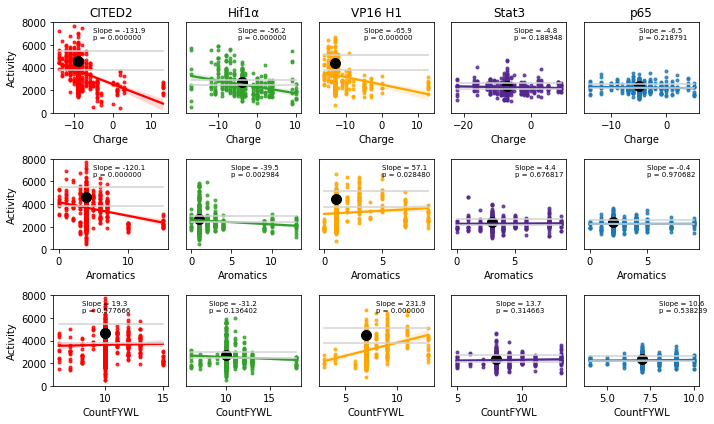

In [18]:
# regression
propset = ['Charge','Aromatics','CountFYWL']
xloc={'Charge':-5, 'Aromatics':5,'CountFYWL':8} 
fig = plt.figure(figsize=(10,3+len(propset)))
for k, prop in enumerate(propset):
    holdBetas,holdpvals = [],[]
    for j,ad in enumerate(ADlist):
        holdCharge, holdActivity = [],[]
        for i, rep in enumerate(BioReps):
            # use this line to exclude the very positive variants from the regression
#             indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))&(masterDF[prop]<11)
    #         indx = (masterDF[ad]==1)&((masterDF[PropertyDict[prop]]==1))
            indx = (masterDF[ad]==1)
            tempDF = masterDF[indx]
            holdCharge.extend(tempDF[prop])
            holdActivity.extend(tempDF[rep])
        print 
        print ad
        X = statsmodels.api.add_constant(holdCharge)
        mod = statsmodels.api.GLS(holdActivity,X)
        reg = mod.fit()
    #     print (reg.summary())
        print 'R2 = %f '% reg.rsquared
        print( 'parameters ',reg.params)
        print( 'p values ',reg.pvalues)
    #     try2 =  np.polyfit(holdCharge,holdActivity,1)
    #     print try2

    #compute regression

        params = reg.params
        pvalues =reg.pvalues
        holdBetas.append(params[1])
        holdpvals.append(pvalues[1])

        plt.subplot(len(propset),5,k*5+j+1)
        if k ==0:
            plt.title(TitleDict[ad])
        plt.ylim([0,8000])
        plt.xlabel(prop)
        if j ==0:
            plt.ylabel('Activity')
        else:
            plt.yticks([])
        sns.regplot(holdCharge,holdActivity,marker='.',color=ADcolorDict[ad],robust=False,x_jitter=False ,fit_reg=True)
        plotwt(ad,prop,color='k')
        plt.text(xloc[prop],6500,'Slope = %.1f \np = %.6f'%(params[1],pvalues[1]),fontsize=7)

    #     print reg.params
    print 'slope\tp value'
    for i, val in enumerate(holdBetas):
        print '%.1f\t%s' %(holdBetas[i], holdpvals[i])
    print 
plt.tight_layout()
plt.savefig('Figures/'+Folder+'ChargeRegression_ShowAllData.pdf')
plt.show()

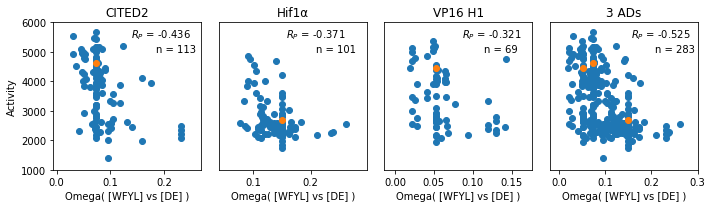

In [33]:
param =  'Omega_WFYL_DE'
def plotscatter(indx,title):
    tempDF = masterDF[indx]
    plt.scatter(tempDF[param],tempDF[currentItem])
    corr = scipy.stats.pearsonr(tempDF.Activity_Mean_MSS18,tempDF[param])
    plt.title(TitleDict[ad])
#     plt.title('%s\n$R_P$ = %.3f\n n =% i' %(TitleDict[ad],corr[0], sum(indx)))
    plt.text(.6*max(tempDF[param]),5500,'$R_P$ = %.3f' %corr[0])
    plt.text(.8*max(tempDF[param]),5000,'n = %i'% sum(indx))
    wt = tempDF[tempDF.WT]
#     print wt[currentItem]
    plt.scatter(wt[param],wt[currentItem])
#     plt.xlabel(param)

fig = plt.figure(figsize=(10,3))    
for i, ad in enumerate(ADlist[0:3]):
    plt.subplot(1,4,1+i)
    indx = masterDF[ad]&(masterDF[param]>0)
    plotscatter(indx,ad)
    if i ==0:
        plt.ylabel('Activity')
    else:
        plt.yticks([])
    plt.ylim([1000,6000])
    plt.xlabel('Omega( [WFYL] vs [DE] )')
plt.subplot(1,4,4)
indx = (masterDF[vp16]|masterDF[cited]|masterDF[hif1a])&(masterDF[param]>0)
plotscatter(indx,'3 ADs')
plt.title('3 ADs')
plt.yticks([])
plt.ylim([1000,6000])
plt.xlabel('Omega( [WFYL] vs [DE] )')

plt.tight_layout()
plt.savefig('Figures/'+Folder+'Omega.pdf')
plt.show()

# Figure 3 Separation and Predictions

In [20]:
# results of testing the predictions--box plots


In [21]:
PropertySets =[['NCPR','CountFYWL'],['NCPR','CountFYWLM'],['NCPR','Hydrophobicity'],['NCPR','Aromatics']]
# PropertySets =[['NCPR','CountFYWL_norm'],['NCPR','CountFYWLM_norm'],['NCPR','Hydrophobicity'],['NCPR','Aromatics_norm']]
PropertySets =[['Charge','CountFYWL'],['NCPR','CountFYWL_norm'],['Charge','Hydrophobicity'],['NCPR','Hydrophobicity']]



def plot2ProperitesColorBar(ADlist,PropertySets,addjitter = False):
    CountJitter = 0.8
    NormJitter =.02
    JitterCoefs={'NCPR':.1,'Charge':CountJitter,'CountFYWL_norm':CountJitter,'CountFYWLM_norm':NormJitter,'Hydrophobicity':0,
                 'Aromatics_norm':NormJitter, 'CountL_norm':NormJitter,'CountFYWLI_norm':NormJitter,'CountFYWI_norm':NormJitter,
                 'CountFYWL':CountJitter,'CountFYWLM':CountJitter,'Hydrophobicity':0,
                 'Aromatics':CountJitter,'CountL':CountJitter,'CountFYWLI':CountJitter,'CountFYWI':CountJitter}
    xlabelDict = {'Charge':'Net Charge','NCPR':'Net charge per residue','CountFYWL':'Count W,F,Y,L'}
    
    # data subset
    tempADlist = ADlist#[:3]
    indx = np.zeros_like(masterDF[currentItem])
    for ad in tempADlist:
        indx = indx + (masterDF[ad]==True)
    indx = indx >0
    tempDF = masterDF[indx]
    tempDF=tempDF.sort_values(by=currentItem,ascending=True)

    for i, propset in enumerate(PropertySets):
        #         plt.xlabel(xlabelDict[propset[0]]),plt.ylabel(propset[1])
        if addjitter==True:
            x= tempDF[propset[0]]+(np.random.rand(len(tempDF[propset[0]]))-0.5)*JitterCoefs[propset[0]]
            y= tempDF[propset[1]]+(np.random.rand(len(tempDF[propset[1]]))-0.5)*JitterCoefs[propset[1]]
        else:
            x= tempDF[propset[0]]
            y= tempDF[propset[1]]
        sc = plt.scatter(x,y,c=tempDF[currentItem],cmap='plasma',label='',alpha=0.5)
        # make color bar same for all plots
        cbar = plt.colorbar(sc,shrink=1, aspect=20,label= 'Activity',ticks=[-1.5,0,1.5])
        cbar.set_clim(minActivity,maxActivity)
        #plot WT
        for j,ad in enumerate(ADlist):      
            tempWTDF = WTDF[WTDF[ad]]
            plt.scatter(tempWTDF[propset[0]],tempWTDF[propset[1]],c=ADcolorDict[ad],marker='+',
                        s=100,label=TitleDict[ad],alpha=1)


    plt.legend(fontsize=7)
# humanTFproteomeDFv2 = pd.read_pickle('pickleFiles/humanTFproteomeDFv2_wIDRs_wIUpred')
# Counts = pickle.load(open('pickleFiles/HumanTFTiles_Counts','r'))
# PredictedCounts2 = pickle.load(open('pickleFiles/Predicted_Counts2'))
# PredictedCounts = pickle.load(open('pickleFiles/Predicted_Counts'))
# predictedADRegionsDF = pd.read_pickle('pickleFiles/RegionB_AD_Predictions_20200722')

colormap,colormap2,dotcolor = 'Blues','Reds','r'
# colormap,dotcolor = 'Greys','r'
ADcolorDict2 ={'CITED2_N':'*', 'vp16N_C':'x'}
def overlayPredictionsOverAllTiles_v2(propset =['Charge','AllHydros'],flip=False):
    Prop1Span = np.arange(min(humanTFproteomeDFv2[propset[0]]),max(humanTFproteomeDFv2[propset[0]]),1)
    Prop2Span = np.arange(min(humanTFproteomeDFv2[propset[1]]),max(humanTFproteomeDFv2[propset[1]])+1,1)
    Prop1SpanMesh, Prop2SpanMesh = np.meshgrid(Prop1Span,Prop2Span)
    ## TFome
    Z =np.log10(Counts.transpose()) 
#     Z =Counts.transpose()
        ## add the predicted ADs
    Pred = np.log10(PredictedCounts.transpose())    
#     Pred = (PredictedCounts2.transpose())    
    if flip:
        Y,X= Prop1SpanMesh, Prop2SpanMesh,
        y,x = predictedADRegionsDF[propset[0]],predictedADRegionsDF[propset[1]]        
    else:
        X,Y= Prop1SpanMesh, Prop2SpanMesh,
        x,y = predictedADRegionsDF[propset[0]],predictedADRegionsDF[propset[1]]
    cs  = ax.scatter(X,Y, c=Z,cmap=colormap, alpha=1,label='All TF regions',marker='s',s=21
                     ,linewidths=0)
    cs2 = ax.scatter(X,Y,c=Pred,cmap='Reds',alpha=1,marker='s',s=21,linewidths=0)
        # WT
    for j,ad in enumerate([vp16,cited]):      
        tempWTDF = WTDF[WTDF[ad]]
        plt.scatter(tempWTDF[propset[0]],tempWTDF[propset[1]],c='w',marker=ADcolorDict2[ad],s=20,label=TitleDict[ad],alpha=1)

    # Add a color bar which maps values to colors.
    fig.colorbar(cs, shrink=1, aspect=20,label='log10(Abundance)',ticks=[0,1,2,3,4],drawedges=False)
    fig.colorbar(cs2, shrink=1, aspect=20,label='log10(Abundance)',ticks=[0,1,2,3,4],drawedges=False)

    # annotate
    fractionofregions = 100.0*len(predictedADRegionsDF)/len(humanTFproteomeDFv2)
    templabel ='%.2f'%fractionofregions
    plt.text(-28,12,templabel,color=dotcolor,fontsize=7)

In [22]:
def  plotWT():
    for j,ad in enumerate(ADlist[:3]):      
        tempWTDF = WTDF[WTDF[ad]]
        plt.scatter(tempWTDF[PropertySet[0]],tempWTDF[PropertySet[1]],c='lightgray',edgecolors=None,marker=ADshapeDict[ad],s=60,label=TitleDict[ad],alpha=1)

def plot2ProperitesSpacePoints(CurrentDF,PropertySet):
    fig = plt.figure(figsize=(7.2,3.1))
    
    SortedDF=CurrentDF.sort_values(by=currentItem,ascending=True)
    minXprop, maxXprop = min(SortedDF[PropertySet[0]]),max(SortedDF[PropertySet[0]])
    minYprop, maxYprop = min(SortedDF[PropertySet[1]]),max(SortedDF[PropertySet[1]])
    
    Xs,Ys,activities,medians,medX,medY = [],[],[],[],[],[]
    print '%i %i %i %i' %(minXprop, maxXprop,    minYprop, maxYprop)
    counts = []
    for i in  np.arange(minXprop,maxXprop+1,1):
        for j in np.arange(minYprop,maxYprop+1,1):
            indx = (SortedDF[PropertySet[0]]==i)&((SortedDF[PropertySet[1]]==j))
            if sum(indx)>0:
                counts.append(sum(indx))
                tempDF = SortedDF[indx]
                if sum(indx)==1:
                    Xs.append(tempDF[PropertySet[0]])
                    Ys.append(tempDF[PropertySet[1]])
                    activities.append(tempDF[currentItem])
                    medians.append(np.median(tempDF[currentItem]))
                    medX.append(tempDF[PropertySet[0]])
                    medY.append(tempDF[PropertySet[1]])
                else:
                    currentlen = np.ceil(np.sqrt(sum(indx)))
                    tempint = 0
                    spacer = 0.2
                    center =(0.5*spacer*(currentlen-1))
                    medians.append(np.median(tempDF[currentItem]))
                    medX.append(np.median(tempDF[PropertySet[0]]))
                    medY.append(np.median(tempDF[PropertySet[1]]))
                    for k, row in tempDF.iterrows():
                        xjitter = spacer*(tempint%currentlen)-center
                        yjitter=  spacer*np.floor(tempint/currentlen)-center #use this line for a square grid
#                         yjitter=  spacer*(tempint/currentlen)-(0.4*spacer*currentlen) #use this line for a diagonal grid
                        Xs.append(i+xjitter)
                        Ys.append(j+yjitter)
                        activities.append(row[currentItem])
                        tempint+=1
    print max(counts)
    plt.scatter(Xs,Ys,c=activities,s=4,cmap='plasma',marker='s')
    cbar =plt.colorbar()
    cbar.set_label('Activity')
    plt.xlabel(xlabelDict[PropertySet[0]]),plt.ylabel(ylabelDict[PropertySet[1]])
    plt.yticks([5,10,15])
    #plot WT
    plotWT()
    plt.savefig('Figures/%sNew2dplot_wgrid.pdf'%(Folder))
    plt.show()
    
    #medians
    fig = plt.figure(figsize=(7.6,3.5))
    plt.scatter(medX,medY,c=medians,s=70,cmap='plasma',marker='s')
    plt.xlabel(xlabelDict[PropertySet[0]]),plt.ylabel('Count W,F,Y,L')
    #plot WT
    cbar =plt.colorbar()
    cbar.set_label('Activity')
#     cbar.set_clim(minActivity,maxActivity)
    plotWT()
    plt.legend(frameon=False,fontsize=8)
    plt.savefig('Figures/%sNew2dplot_Medians.pdf'%(Folder))
    plt.show()
tempADlist = ADlist[:3]
indx = np.zeros_like(masterDF[currentItem])
for ad in tempADlist:
    indx = indx + (masterDF[ad]==True)
indx = indx >0
CurrentDF = masterDF[indx]
PropertySet=['Charge','CountFYWL']
plot2ProperitesSpacePoints(CurrentDF,PropertySet)    

-17 13 3 18
36


NameError: global name 'xlabelDict' is not defined

In [ ]:
masterDF['AllHydros']=masterDF.CountFYWL
WTDF['AllHydros']=WTDF.CountFYWL

fig = plt.figure(figsize=(7.13,2))
ax = fig.add_subplot(111)
propset =['Charge','AllHydros']
overlayPredictionsOverAllTiles_v2(propset)
ax.set_xlabel('Count W,F,Y,L',fontsize=7)
ax.set_ylabel('Net Charge',fontsize=7)
ax.set_xlabel('Net Charge',fontsize=7)
ax.set_ylabel('Count W,F,Y,L',fontsize=7)
ax.set_yticks([0,5,10,15])
ax.set_yticklabels([0,5,10,15],fontsize=7)
ax.set_xticks([-20,0,20])
ax.set_xticklabels([-20,0,20],fontsize=7)



plt.tight_layout()
plt.savefig('Figures/'+Folder+'Figure5_wide.pdf')



plt.show()

In [ ]:
# supplemental figure to show all replicates and all ADs for 2D plot
xlabelDict = {'Charge':'Net Charge','NCPR':'Net charge per residue'}
ylabelDict ={'CountFYWL':'W,F,Y,L Count','CountFYWL_norm':'W,F,Y&L Count\nlength normalized',
             'Hydrophobicity':'Hydrophobicity','Aromatics':'Aromatics'}
ADshapeDict={'vp16N_C':'X', 'CITED2_N':'*', 'Hif1-AD2_46':'P', 'p65':'h', 'stat3':'D'}

def  plotWTin2D():
    for j,ad in enumerate(ADlist):      
        tempWTDF = WTDF[WTDF[ad]]
        plt.scatter(tempWTDF[PropertySet[0]],tempWTDF[PropertySet[1]],c='darkgray',edgecolors=None,marker=ADshapeDict[ad],s=40,label=TitleDict[ad],alpha=.5)

def plot2ProperitesSpacePoints(CurrentDF,PropertySet,minActivity_literal,maxActivity_literal,plotcolorbar=0,markersize=4):
#     fig = plt.figure(figsize=(9,5))
    SortedDF=CurrentDF.sort_values(by=currentItem,ascending=True)
    minXprop, maxXprop = min(SortedDF[PropertySet[0]]),max(SortedDF[PropertySet[0]])
    minYprop, maxYprop = min(SortedDF[PropertySet[1]]),max(SortedDF[PropertySet[1]])
    Xs,Ys,activities,medians,medX,medY = [],[],[],[],[],[]
    counts = []
    for i in  np.arange(minXprop,maxXprop+1,1):
        for j in np.arange(minYprop,maxYprop+1,1):
            indx = (SortedDF[PropertySet[0]]==i)&((SortedDF[PropertySet[1]]==j))
            if sum(indx)>0:
                counts.append(sum(indx))
                tempDF = SortedDF[indx]
                if sum(indx)==1:
                    Xs.append(tempDF[PropertySet[0]])
                    Ys.append(tempDF[PropertySet[1]])
                    activities.append(tempDF[currentItem])
                    medians.append(np.median(tempDF[currentItem]))
                    medX.append(tempDF[PropertySet[0]])
                    medY.append(tempDF[PropertySet[1]])
                else:
                    currentlen = np.ceil(np.sqrt(sum(indx)))
                    tempint = 0
                    spacer = 0.2
                    center =(0.5*spacer*(currentlen-1))
                    medians.append(np.median(tempDF[currentItem]))
                    medX.append(np.median(tempDF[PropertySet[0]]))
                    medY.append(np.median(tempDF[PropertySet[1]]))
                    for k, row in tempDF.iterrows():
                        xjitter = spacer*(tempint%currentlen)-center
                        yjitter=  spacer*np.floor(tempint/currentlen)-center #use this line for a square grid
#                         yjitter=  spacer*(tempint/currentlen)-(0.4*spacer*currentlen) #use this line for a diagonal grid
                        Xs.append(i+xjitter)
                        Ys.append(j+yjitter)
                        activities.append(row[currentItem])
                        tempint+=1
    plt.scatter(Xs,Ys,c=activities,s=markersize,cmap='plasma',marker='s',vmin=minActivity_literal,vmax=maxActivity_literal)
    if plotcolorbar:
        cbar = plt.colorbar()
        cbar.set_label('Activity')            
        cbar.set_clim(minActivity,maxActivity)

    plt.xlabel(xlabelDict[PropertySet[0]]),plt.ylabel(ylabelDict[PropertySet[1]])
    #plot WT
#     plotWTin2D()

    
#     plt.savefig('Figures/%sNew2dplot_wgrid.pdf'%(Folder))
#     plt.show()


tempADlist = ADlist[:3]
indx = np.zeros_like(masterDF[currentItem])
for ad in tempADlist:
    indx = indx + (masterDF[ad]==True)
indx = indx >0
CurrentDF = masterDF[indx]
PropertySet=['Charge','CountFYWL']



fig = plt.figure(figsize=(19,9))

for i, rep in enumerate(BioReps):
    maxActivity = 6000 #max(masterDF[rep])
#     if i ==0:
#         maxActivity = 6000
    minActivity = 1000# min(masterDF[rep])
    for j,ad in enumerate(ADlist):
        plt.subplot(5,5,i*5+j+1)
        #plot WT
        plotWTin2D()
        indx = (masterDF[ad]==1)#&((masterDF[PropertyDict[prop]]==1))
        tempDF = masterDF[indx]
        
        plotcolorbar = (j==4)
        
        plot2ProperitesSpacePoints(tempDF,PropertySet,minActivity,maxActivity,plotcolorbar,markersize=1)
        #rescale y axis
        plt.ylim(2.5,18.5), plt.xlim(-22.5,13.5)
#             plt.ylim(minActivity,maxActivity),
#         plt.xlabel(propertyXlabls[prop],fontproperties=font)
        if j==0:
            plt.ylabel(BioRepsNameDict[rep] + '\nW,F,Y,L Count')
            plt.yticks(fontsize=7)
        else:
            plt.ylabel('')
            plt.yticks([5,10,15],['','',''])
        if i==0:
            plt.title(TitleDict[ad],fontproperties=font) 
        if i <4:
            plt.xticks([-10,0,10],['','',''],fontsize=7)
            plt.xlabel('')
        else:
            
            plt.xlabel('Net Charge',fontproperties=font)
            plt.xticks([-10,0,10],fontsize=7)
    
# plt.tight_layout()      
plt.legend()
# plt.savefig('Figures/PaperFigDrafts_Supp/SX_showalldata_2D.pdf')
plt.savefig('Figures/'+Folder+'SX_showalldata_2D.pdf')

plt.show()

In [ ]:
def plot2ProperitesSpacePointsSupp(CurrentDF,PropertySet):
   
    SortedDF=CurrentDF.sort_values(by=currentItem,ascending=True)
    minXprop, maxXprop = min(SortedDF[PropertySet[0]]),max(SortedDF[PropertySet[0]])
    minYprop, maxYprop = min(SortedDF[PropertySet[1]]),max(SortedDF[PropertySet[1]])
    
    Xs,Ys,activities,medians,medX,medY = [],[],[],[],[],[]
    print '%i %i %i %i' %(minXprop, maxXprop,    minYprop, maxYprop)
    counts = []
    for i in  np.arange(minXprop,maxXprop+1,1):
        for j in np.arange(minYprop,maxYprop+1,1):
            indx = (SortedDF[PropertySet[0]]==i)&((SortedDF[PropertySet[1]]==j))
            if sum(indx)>0:
                counts.append(sum(indx))
                tempDF = SortedDF[indx]
                if sum(indx)==1:
                    Xs.append(tempDF[PropertySet[0]])
                    Ys.append(tempDF[PropertySet[1]])
                    activities.append(tempDF[currentItem])
                    medians.append(np.median(tempDF[currentItem]))
                    medX.append(tempDF[PropertySet[0]])
                    medY.append(tempDF[PropertySet[1]])
                else:
                    currentlen = np.ceil(np.sqrt(sum(indx)))
                    tempint = 0
                    spacer = 0.2
                    center =(0.5*spacer*(currentlen-1))
                    medians.append(np.median(tempDF[currentItem]))
                    medX.append(np.median(tempDF[PropertySet[0]]))
                    medY.append(np.median(tempDF[PropertySet[1]]))
                    for k, row in tempDF.iterrows():
                        xjitter = spacer*(tempint%currentlen)-center
                        yjitter=  spacer*np.floor(tempint/currentlen)-center #use this line for a square grid
#                         yjitter=  spacer*(tempint/currentlen)-(0.4*spacer*currentlen) #use this line for a diagonal grid
                        Xs.append(i+xjitter)
                        Ys.append(j+yjitter)
                        activities.append(row[currentItem])
                        tempint+=1
    
    #medians
    
    plt.scatter(medX,medY,c=medians,s=30,cmap='plasma',marker='s')
    plt.xlabel(xlabelDict[PropertySet[0]]),plt.ylabel(PropertySet[1])
    cbar = plt.colorbar()
    cbar.set_label('Activity')    

    
    #plot WT
    for j,ad in enumerate(ADlist[:3]):      
        tempWTDF = WTDF[WTDF[ad]]
        plt.scatter(tempWTDF[PropertySet[0]],tempWTDF[PropertySet[1]],c='darkgray',edgecolors=None,marker=ADshapeDict[ad],s=40,label=TitleDict[ad],alpha=.5)

    plt.legend(frameon=False,fontsize=8)

# tempADlist = ADlist[:3]
# indx = np.zeros_like(masterDF[currentItem])
# for ad in tempADlist:
#     indx = indx + (masterDF[ad]==True)
indx =(masterDF.vp16N_C|masterDF.CITED2_N|masterDF[hif1a])
CurrentDF = masterDF[indx]

fig = plt.figure(figsize=(9,1.8))
plt.subplot(1,2,1)
plot2ProperitesSpacePointsSupp(CurrentDF,['Charge','Aromatics'])  

PropertySet =['Charge','Hydrophobicity']
plt.subplot(1,2,2)
x= CurrentDF[PropertySet[0]]
y= CurrentDF[PropertySet[1]]

#         plt.scatter(x,y,c=tempDF[currentItem],cmap='magma',label='')
plt.scatter(x,y,c=CurrentDF[currentItem],cmap='plasma',label='',alpha=0.5)
cbar = plt.colorbar()
cbar.set_label('Activity')
plt.ylabel(PropertySet[1])
#plot WT
for j,ad in enumerate(ADlist[:3]):      
        tempWTDF = WTDF[WTDF[ad]]
        plt.scatter(tempWTDF[PropertySet[0]],tempWTDF[PropertySet[1]],c='darkgray',edgecolors=None,marker=ADshapeDict[ad],s=40,label=TitleDict[ad],alpha=.5)

plt.savefig('Figures/%sSuppFig_2Dvariations.pdf'%(Folder))
plt.show()

# Figure S11 Machine Learning

In [ ]:
# data subset
thresholdSet = [2900,3400]

#####################################################################
def calc_TPR_FPR(PredictedHighExp):
    PredictedLowExp = ~PredictedHighExp
    #reorganize full data
    ActualPositives = (tempExp>thresholdSet[1])
    ActualNegatives = (tempExp<thresholdSet[0])
    #True positives
    TP =sum(PredictedHighExp&ActualPositives)
    #False positives
    FP = sum(PredictedHighExp&ActualNegatives)
    #False negatives
    FN = sum(PredictedLowExp&ActualPositives)
    #True negatives
    TN = sum(PredictedLowExp&ActualNegatives)
    TruePosRate =1.0* TP/ (TP+FN)
    FalsePosRate=1.0* FP/ (FP+TN)
    return FalsePosRate,TruePosRate

#Calculate value of each variant with the 'AD Predictor' for the proteome.
Line,LowerCorner,UpperCorner,SLOPE =[-9,10],[-13,7],[-9,10],1
LineValue = SLOPE*(tempDFmidterm.Charge-Line[0])-(tempDFmidterm.CountFYWL-Line[1])
PredictedHighExp = (LineValue<=0)  &  (tempDFmidterm.Charge<=UpperCorner[0]) &(tempDFmidterm.CountFYWL>=LowerCorner[1]) 
FalsePosRate,TruePosRate = calc_TPR_FPR(PredictedHighExp)

#Calculate value of each variant with the 'AD Predictor AROMATICS ONLY' for the proteome.
Line,LowerCorner,UpperCorner,SLOPE =[-9,4],[-13,1],[-9,4],1
LineValue = SLOPE*(tempDFmidterm.Charge-Line[0])-(tempDFmidterm.Aromatics -Line[1])
Aro_PredictedHighExp = (LineValue<=0)  &  (tempDFmidterm.Charge<=UpperCorner[0]) &(tempDFmidterm.Aromatics>=LowerCorner[1]) 
Aro_FalsePosRate,Aro_TruePosRate = calc_TPR_FPR(Aro_PredictedHighExp)

proteomedotsize=50
proteomeColor,proteomeColor2 ='k','c'
#####################################################################

def runMLmodels(ModelSets):
    HoldModels, HoldAvgAUCset = [] ,[]

    # data subset
    normalize = True
    plotrecall = False
    indx = (masterDF.Shuffle!=True)&(masterDF.vp16N_C|masterDF.CITED2_N|masterDF[hif1a])&((masterDF[currentItem]<thresholdSet[0])|(masterDF[currentItem]>thresholdSet[1]))
    tempDFmidterm = masterDF[indx]

    Nwide,Ntall = 4,len(ModelSets)
    plotcolor = 'r'
    fontsize,titlefontsize = 7,9
    # Activity data
    tempExp = tempDFmidterm[currentItem]

    ON_OFFclasses = tempExp>thresholdSet[1]
    print 'There are %i datapoints in the High Class and %i in the Low Class' %(sum(ON_OFFclasses),sum(~ON_OFFclasses))
    a = ON_OFFclasses.as_matrix()
    Classes = a.astype(int)
    # print "ON/OFF threshold is " + threshnames[0]

    ## 5-fold cross validation, splitting data once into 5 sets and leaving out one set each time 20161212
    sets = np.random.random_integers(0,4,len(Classes))     ## create sample and test sets

    fig = plt.figure(figsize=(7.5,5))
    for j, cols in enumerate(ModelSets):

        # pull out only the columns for the parameters of interest
        tempDF = tempDFmidterm[cols]
        if normalize:
            tempDF_norm = (tempDF - tempDF.min()) / (tempDF.max()-tempDF.min()) # stretch to [0,1]
        ML_DF = tempDF_norm
        print 'Using %i datapoints and %i parameters  \n' % (len(tempExp), len(cols))
    #     print 'SVM           Log. Reg    Random Forest AUCs'
        holdAUCs_PRC, holdAUCs_ROC = np.zeros((3,5)),np.zeros((3,5))
        hold_LR_params = np.zeros((ML_DF.shape[1],5))
        hold_LR_intercetps =[]
        for i in xrange(0,5):     ## 5-fold cross validation, splitting data once into 5 sets and leaving out one set each time 20161212
            trainFeatures = ML_DF[sets!=i]
            testFeatures  = ML_DF[sets==i]
            trainClasses = Classes[sets!=i]
            testClasses = Classes[sets==i]
            # SVM
            SVM =svm.SVC(kernel='linear', C=1.0, probability=True)
            SVM.fit(trainFeatures,trainClasses)
            SVM_Predictions = SVM.predict_proba(testFeatures)
            holdAUCs_ROC[0,i] = metrics.roc_auc_score(testClasses,SVM_Predictions[:,1])
            fpr, tpr, thresholds = metrics.roc_curve(testClasses,SVM_Predictions[:,1],pos_label=1)
            plt.subplot(Ntall,Nwide,1+j*Nwide), 
            if j ==0:
                plt.title('Support Vector Machine', fontsize=titlefontsize)
            plt.plot(fpr,tpr,color=plotcolor)
            plt.scatter(FalsePosRate,TruePosRate,s=proteomedotsize,c=proteomeColor)# plot the proteome predictor
            plt.scatter(Aro_FalsePosRate,Aro_TruePosRate,s=proteomedotsize,c=proteomeColor2)# plot the proteome predictor
            # precision recall curve
            if plotrecall:
                precision, recall, thresholds= metrics.precision_recall_curve(testClasses,SVM_Predictions[:,1]) #PR curve
                plt.plot(recall[::-1],precision[::-1],color='red')
                holdAUCs_PRC[0,i] = metrics.average_precision_score(testClasses,SVM_Predictions[:,1]) #PRC AUC


            #Logistic regression
            LR_fit = sklearn.linear_model.LogisticRegression(penalty='l1')
            LR_fit.fit(trainFeatures,trainClasses)
            LR_Predictions = LR_fit.predict_proba(testFeatures)
            holdAUCs_ROC[1,i] = metrics.roc_auc_score(testClasses,LR_Predictions[:,1]) # ROC AUC
            plt.subplot(Ntall,Nwide,2+j*Nwide), 
            if j ==0:
                plt.title('Logistic Regression', fontsize=titlefontsize)
            plt.plot(fpr,tpr,color=plotcolor)
            plt.scatter(FalsePosRate,TruePosRate,s=proteomedotsize,c=proteomeColor)# plot the proteome predictor
            plt.scatter(Aro_FalsePosRate,Aro_TruePosRate,s=proteomedotsize,c=proteomeColor2)# plot the proteome predictor
            hold_LR_params[:,i]= LR_fit.coef_
            hold_LR_intercetps.append(LR_fit.intercept_)
            # precision recall curve
            if plotrecall:
                precision, recall, thresholds= metrics.precision_recall_curve(testClasses,LR_Predictions[:,1]) #PR curve
                plt.plot(recall[::-1],precision[::-1],color='red')
                holdAUCs_PRC[1,i] = metrics.average_precision_score(testClasses,LR_Predictions[:,1]) #PRC AUC

            # Random Forest
            RF_fit = sklearn.ensemble.RandomForestClassifier(max_depth=3, n_estimators=10)
            RF_fit.fit(trainFeatures,trainClasses)
            RF_Predictions = RF_fit.predict_proba(testFeatures)
            holdAUCs_ROC[2,i] = metrics.roc_auc_score(testClasses,RF_Predictions[:,1])
            fpr, tpr, thresholds = metrics.roc_curve(testClasses,RF_Predictions[:,1],pos_label=1)
            plt.subplot(Ntall,Nwide,3+j*Nwide), 
            if j ==0:
                plt.title('Random Forest', fontsize=titlefontsize)
            plt.plot(fpr,tpr,color=plotcolor)
            plt.scatter(FalsePosRate,TruePosRate,s=proteomedotsize,c=proteomeColor)# plot the proteome predictor
            plt.scatter(Aro_FalsePosRate,Aro_TruePosRate,s=proteomedotsize,c=proteomeColor2)# plot the proteome predictor
            # precision recall curve
            if plotrecall:
                precision, recall, thresholds= metrics.precision_recall_curve(testClasses,RF_Predictions[:,1]) #PR curve
                plt.plot(recall[::-1],precision[::-1],color='red')
                holdAUCs_PRC[2,i] = metrics.average_precision_score(testClasses,RF_Predictions[:,1]) #PRC AUC
        #list the parameters
        plt.subplot(Ntall,Nwide,4+j*Nwide)
        if j ==0:
            plt.hist(tempDFmidterm[currentItem],40,normed=1,alpha=.4,label='Activities')
            plt.plot([thresholdSet[1],thresholdSet[1]],[0,.001],label='High activity n = %i'%sum(ON_OFFclasses))
            plt.plot([thresholdSet[0],thresholdSet[0]],[0,.001],label='Low activity n = %i'%sum(~ON_OFFclasses))
            plt.legend(fontsize=7)
        plt.text(0,0.0005,'Model %i Parameters'% (j+1), fontsize=titlefontsize)
        for k, entry in enumerate(cols):
            plt.text(0,0.0004-0.0001*k,entry,fontsize=titlefontsize),plt.xticks([]),plt.yticks([])
            if k ==0:
                model = entry
            else:
                model = model + ', ' + entry
        plt.ylim([0,.001])
        HoldModels.append(model)
        # the avgAUCs
        HoldAvgAUCset.append(holdAUCs_ROC)

        # print parameters
        printparamters = False
        if printparamters == True:
            print "SVM \t\t Logistic Reg \t Random Forest" 
            for indx, parameter in enumerate(tempDF.columns):
                print ('%f \t %f \t %f \t' %(SVM.coef_[0][indx], LR_fit.coef_[0][indx],RF_fit.feature_importances_[indx])) + parameter
            print '%f \t %f \t \t\tIntercept \n' %( SVM.intercept_[0], LR_fit.intercept_[0])

        for i in xrange(0,3):
            plt.subplot(Ntall,Nwide,i+1+j*Nwide)
            plt.plot([0, 1], [0, 1], 'k--')
            plt.text(.3,.1,'AUC = %.3f' % np.mean(holdAUCs_ROC,axis=1)[i],fontsize=fontsize)
            if plotrecall:
                plt.text(.4,.2,'Avg Precision = %.3f' % np.mean(holdAUCs_PRC,axis=1)[i])
                plt.xlabel('Gray: False positive rate\nRed: Recall',fontsize=7), plt.ylabel('True positive rate\nRed: Precision',fontsize=7)
            else:
                plt.xticks([]),plt.yticks([])
                if j >=len(ModelSets)-1:
                    plt.xticks([0,.5,1],fontsize=fontsize)
                    plt.xlabel('False positive rate',fontsize=7)
                plt.subplot(Ntall,Nwide,1+j*Nwide)
                plt.ylabel('True positive rate',fontsize=7), plt.yticks([0,.5,1],fontsize=fontsize)



    # plt.tight_layout()
    plt.savefig('Figures/'+Folder+'Figure_S15_MachineLearningSummary.pdf')
    plt.show()


    # print out models and Avg AUC values to a file
    filename = 'Figures/'+Folder+'TableS1_MachineLearningAUCs.txt'
    target =open(filename,'w')
    target.write('Model Parameters\tSupport Vector Machine Avg. AUC\tLogistic Regression Avg. AUC\tRandom Forest Avg. AUC\n')
    for i, aucset in enumerate(HoldAvgAUCset):
        string = '%s\t%.4f\t%.4f\t%.4f\n'%(HoldModels[i],np.mean(aucset[0]),np.mean(aucset[1]),np.mean(aucset[2]))
        target.write(string)
    target.close()

ModelSets = [
    ['Charge','CountFYWL'],
    ['Charge','CountW','CountF','CountY','CountL'],
#     ['Charge'],
#     ['CountFYWL'],
]
runMLmodels(ModelSets)

In [ ]:
ModelSets = [
    ['Charge','CountFYWL'],
    ['Charge','CountW','CountF','CountY','CountL'],
    ['Charge'],
    ['CountFYWL'],
    ['Charge','Aromatics'],
    ['Charge','CountW','CountF','CountY','CountL'],
    [         'CountW','CountF','CountY','CountL'],
    ['Charge'         ,'CountF','CountY','CountL'],
    ['Charge','CountW',         'CountY','CountL'],
    ['Charge','CountW','CountF',         'CountL'],
    ['Charge','CountW','CountF','CountY'         ],
    ['CountW','CountF','CountY','CountL','CountE','CountD','CountK','CountR'],
    [         'CountF','CountY','CountL','CountE','CountD','CountK','CountR'],
    ['CountW',         'CountY','CountL','CountE','CountD','CountK','CountR'],
    ['CountW','CountF',         'CountL','CountE','CountD','CountK','CountR'],
    ['CountW','CountF','CountY',        'CountE','CountD','CountK','CountR'],
    ['CountW','CountF','CountY','CountL','CountD','CountK','CountR'],
    ['CountW','CountF','CountY','CountL','CountE','CountK','CountR'],
    ['CountW','CountF','CountY','CountL','CountE','CountD','CountR'],
    ['CountW','CountF','CountY','CountL','CountE','CountD','CountK'],
    
]
runMLmodels(ModelSets)

### Plot the boxplots of for the predicted ADs

In [ ]:
# list out the neutral variants for Figure S9 --exchange identities of positive charges
indx = masterDF[cited] &(masterDF.Charge==-9)&(masterDF.PerturbCharge|masterDF.WT)
tempDF = masterDF[indx]
tempDF = tempDF.sort_values(by=currentItem,ascending=False)
tempDF[[currentItem, 'shortname','WT']]


# Figure 4

### Figure 1A: Leucines matter

In [ ]:

supportfontsize =7
def plotDMSBoxPlot(ADlist,CurrentData,indxType=''):
    fig = plt.figure(figsize=(6,6))
    for iii,CurrentAD in enumerate(ADlist):
        ax = fig.add_subplot(len(ADlist),1,iii+1)

        AvgActivities =[]
        indx = (masterDF[CurrentAD])#&(masterDF[indxType]==True)
        indx = (masterDF[CurrentAD])&(masterDF.Shuffle==False)
        if CurrentAD =='p65':
            indx = (masterDF[CurrentAD]) &(0==(masterDF.p65_L2Y))


        temp = masterDF[indx]
        temp = temp[BioReps]
        # reorganize the data so that each replicate is included in the average over positions, not just the average
        temp = temp.stack()
        title = CurrentAD+' '+ indxType+' ' +CurrentData +' n = %i'%sum(indx)

        # create a matrix of mutations: row is sequence, column is position in AD 
        ADseqs =[]
        for val in temp.index.values:
            ADseqs.append(val[0])
        RelativeExpression = temp.values# temp[CurrentData].astype(float)
        WT = WTname2seqDict[CurrentAD]
        WTexp = WTname2currentItemDict[CurrentAD]
        sem = WTname2currentSTDDict[CurrentAD]

        Nads , ADlen, = len(ADseqs), len(WT)
        MutationLocations = np.zeros(shape=(Nads,ADlen))
        for i, seq in enumerate(ADseqs): #for each sequence
            if len(seq)==len(WT):
                for j, pos in enumerate(list(seq)): #for each position
                    MutationLocations[i, j]= pos != WT[j] # record if it is unequal
        tempExpList,Countlist = [],[]
        for i in xrange(0,ADlen):
            tempInd = MutationLocations[:,i]
            tempExp = RelativeExpression[tempInd.astype(bool)]
            tempExpList.append(tempExp)
            Countlist.append(len(tempExp))
            AvgActivities.append(np.mean(tempExp))
        flierprops = dict(marker='.', markerfacecolor='gray', markersize=4,
                  linestyle='none', markeredgecolor='gray')
        bp =plt.boxplot(tempExpList, patch_artist=True,flierprops=flierprops)
        
#     bp =plt.boxplot(Sets, patch_artist=True,)
    
        plt.setp(bp['caps'], color='darkgray')
#         plt.setp(bp['whiskers'], color=lightblue),plt.setp(bp['fliers'], color=lightblue)
        plt.setp(plt.setp(bp['medians'], color='k'))
        plt.setp(bp['boxes'], color='darkgray')
        plt.setp(bp['whiskers'], color='darkgray'),

    #         for patch, color in zip(bp['boxes'], 'cyan'):
#             patch.set_facecolor('darkgray')
        # plot WT
        plt.plot([1,ADlen],[WTexp,WTexp],color='k',label='WT Exp Mean')
        WTstdPatch = mpatches.Rectangle((0,(WTexp-sem)),len(WT)+1,2*sem,alpha=0.3,facecolor='gray')
        ax.add_patch(WTstdPatch)

        plt.xticks(xrange(1,len(WT)+1),WT[:])
        plt.xticks([])
        plt.yticks(ytickset,fontsize=supportfontsize)
#         if iii==0:
#             plt.legend()
        plt.xlim([0, ADlen+1]),
        minY,maxY = -3,4.2
#         plt.ylim([minY,maxY])
        plt.ylabel('Activity',fontsize=8), #plt.xlabel('Position')
        plt.title(TitleDict[CurrentAD])
        AAset_Labels = [ 'Negatives','Hyrdophobics','Positives','Phospho sites','Prolines & Glycines']
        colorSets = ['red','limegreen','blue','deepskyblue','darkviolet']
        AAs2color = ['D','E','W','L','F','Y','K','R']
        AAcolorDict = {'D':'red','E':'red','W':'darkviolet','L':'limegreen',
                       'F':'darkviolet','Y':'darkviolet','K':'blue','R':'blue'}
#         for pos, count in enumerate(Countlist):
#             plt.text(pos+.75,minY,count,fontsize=7)
        #show N
        Countlist =np.array(Countlist)
        print '%s had %i-%i measurements at each point '%(CurrentAD, min(Countlist[Countlist>0]),max(Countlist))
        
        for pos, ADaa in enumerate(WT):
            if ADaa in AAs2color:
                plt.text(pos+.75,-3.5, ADaa, color=AAcolorDict[ADaa],fontsize=supportfontsize, fontweight='bold')
            else:
                plt.text(pos+.75,-3.5, ADaa, color='gray',fontsize=supportfontsize, fontweight='bold')
        plt.text(pos-2,minY+.1,'N = %i'%sum(indx),fontsize=supportfontsize)
    plt.tight_layout()
    plt.savefig('Figures/%sLsMatter_stackReplicates.pdf'%Folder)
    plt.show()
templist = plotDMSBoxPlot(ADlist[:3],currentItem,indxType='Non Shuffle')



# Export data to csv for paper

In [ ]:
exportcols = ['shortname','SystematicName',
              'Activity_Mean_MSS18', 'Activity_std_MSS18',
    'MSS18_Sort_1AvgADActivityOutliersRemovedAndBCsCollapsed_NormToNoAD',
       'MSS18_Sort_2AvgADActivityOutliersRemovedAndBCsCollapsed_NormToNoAD',
       'MSS18_Sort_3AvgADActivityOutliersRemovedAndBCsCollapsed_NormToNoAD',
       'MSS18_Sort_4AvgADActivityOutliersRemovedAndBCsCollapsed_NormToNoAD',
              'MSS18_Sort_5AvgADActivityOutliersRemovedAndBCsCollapsed_NormToNoAD',
              'WT','HandDesigned','PerturbCharge','PerturbAromatics',
              'CITED2_N', 'stat3', 'Hif1-AD2_46','p65_L2Y', 'p65','vp16N_C',
              'CorrectedPvalues', 'SigDiff_NormToNoAD'
             ]
exportDF = masterDF[exportcols]
RenameColDict = {'Zscore_Mean_MSS18':'Activity_Zscore_mean', 'Zscore_SEM_MSS18':'Activity_Zscore_SEM',
       'MSS18_Sort_1AvgADActivityOutliersRemovedAndBCsCollapsed_NormToNoAD':'Biological_Replicate_1_Activity',
       'MSS18_Sort_2AvgADActivityOutliersRemovedAndBCsCollapsed_NormToNoAD':'Biological_Replicate_2_Activity',
       'MSS18_Sort_3AvgADActivityOutliersRemovedAndBCsCollapsed_NormToNoAD':'Biological_Replicate_3_Activity',
       'MSS18_Sort_4AvgADActivityOutliersRemovedAndBCsCollapsed_NormToNoAD':'Biological_Replicate_4_Activity',
       'MSS18_Sort_5AvgADActivityOutliersRemovedAndBCsCollapsed_NormToNoAD':'8_Bin_sort',
        'CorrectedPvalues':'CorrectedPvalues_FDR_5percent',   
                 'SigDiff_NormToNoAD':'SigDiffFromWT',
        'CITED2_N': 'CITED2', 'Hif1-AD2_46': u'Hif1alpha', 'p65': 'p65', 'stat3': 'Stat3', 'vp16N_C': 'VP16 H1',
                 'shortname':'Variant_Name'
                }
exportDF=exportDF.rename(columns=RenameColDict)
exportDF.to_csv('SuppDataSetsForPaper/SupplementalDataset1_ActivityData_5ADs.csv')
       

In [ ]:
BCDF.columns

In [23]:
BCDF   =pd.read_pickle('pickleFiles/MSS18_BCDF_afterProcessingStep2_20210617')
exportcols = ['ADseq','Barcode','MSS18_01',
'MSS18_02',
'MSS18_03',
'MSS18_04',
'MSS18_05',
'MSS18_06',
'MSS18_07',
'MSS18_08',
'MSS18_09',
'MSS18_10',
'MSS18_11',
'MSS18_12',
'MSS18_13R',
'MSS18_14R',
'MSS18_15R',
'MSS18_16R',]
RenameColDict = {'MSS18_01':'Replicate1_Bin1',
'MSS18_02':'Replicate1_Bin2',
'MSS18_03':'Replicate1_Bin3',
'MSS18_04':'Replicate1_Bin4',
'MSS18_05':'Replicate2_Bin1',
'MSS18_06':'Replicate2_Bin2',
'MSS18_07':'Replicate2_Bin3',
'MSS18_08':'Replicate2_Bin4',
'MSS18_09':'Replicate3_Bin1',
'MSS18_10':'Replicate3_Bin2',
'MSS18_11':'Replicate3_Bin3',
'MSS18_12':'Replicate3_Bin4',
'MSS18_13R':'Replicate4_Bin1',
'MSS18_14R':'Replicate4_Bin2',
'MSS18_15R':'Replicate4_Bin3',
'MSS18_16R':'Replicate4_Bin4',
                }
exportBCDF = BCDF[exportcols]
exportBCDF=exportBCDF.rename(columns=RenameColDict)
exportBCDF.to_csv('SuppDataSetsForPaper/SupplementalDataset5_BarcodeList_5ADs.csv')

,ADseq,Barcode,Replicate1_Bin1,Replicate1_Bin2,Replicate1_Bin3,Replicate1_Bin4,Replicate2_Bin1,Replicate2_Bin2,Replicate2_Bin3,Replicate2_Bin4,Replicate3_Bin1,Replicate3_Bin2,Replicate3_Bin3,Replicate3_Bin4,Replicate4_Bin1,Replicate4_Bin2,Replicate4_Bin3,Replicate4_Bin4
0,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,AACAACAACACC,42,164,0,112,250,150,524,463,730,303,1528,960,210,208,1300,0
1,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,AACAACAACGGT,362,565,1137,865,603,326,901,1495,29,0,0,314,0,0,356,0
2,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,AACAACACAAGC,0,317,0,329,161,395,874,321,0,0,0,0,312,318,334,0
3,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,AACAACACCTCA,0,0,430,10,0,0,0,0,0,0,0,0,1256,1002,2138,2437
4,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,AACAACAGAGTC,0,0,310,1,0,0,0,0,245,40,158,74,1507,1291,1897,836
5,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,AACAACAGCCGA,0,0,0,65,0,0,0,0,0,26,201,0,979,1187,471,1177
6,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,AACAACATGGAC,189,761,741,1010,0,0,0,0,74,0,165,433,376,55,0,649
7,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,AACAACATTCGC,0,0,30,23,407,55,843,375,302,158,0,0,0,869,0,0
8,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,AACAACCACTGA,0,109,0,108,84,0,0,0,0,0,178,0,0,260,0,0
9,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,AACAACCATCCA,0,0,0,0,0,0,0,0,65,0,0,241,305,441,1245,896


In [30]:
PredictedADsExpt_BClist = pd.read_pickle('../../Analysis_LC5_predictedADs/KeySupportFiles/CompositeBarcodesDF')


In [31]:
PredictedADsExpt_BClist.columns
# WTname2seqDict[cited]

Index([u'CountsSort1', u'CountsSort2', u'CountsSort3', u'Barcode', u'ADBC',
       u'ADseq'],
      dtype='object')

# p53 supplement figure

-6.0
Zscore_Mean_p53 vs Charge for AD1 r = -0.561 p = 0.00000
2.0
Zscore_Mean_p53 vs Aromatics for AD1 r = 0.559 p = 0.01288
-8.0
Zscore_Mean_p53 vs Charge for AD2 r = -0.516 p = 0.00417
2.0
Zscore_Mean_p53 vs Aromatics for AD2 r = 0.637 p = 0.03496


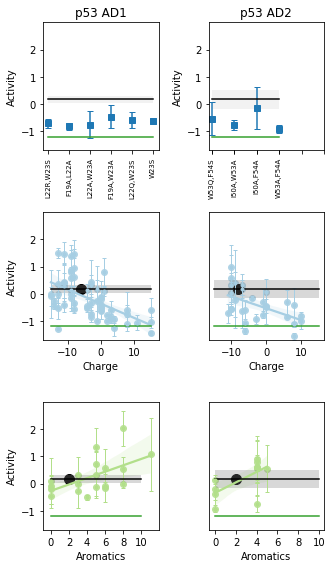

In [4]:
AvgActivtyDF = pd.read_pickle('../../Analysis_LC1_p53DMS/Analysis_202001/AvgActivtyDF')

AvgActivtyDF_new =pd.read_pickle('../../Data/reprocess_p53_June2021/p53_DMS_Reprocessed_3Bioreplicates_MergeBCs_20210730')

for col in ['Zscore_Mean_p53','Zscore_SEM_p53','Activity_Mean_NormToNoAD','Activity_std_NormToNoAD']:
    tempDict = dict(zip(AvgActivtyDF_new.ADseq[1:],AvgActivtyDF_new[col][1:]))
    tempDF = AvgActivtyDF.ADseq
    AvgActivtyDF[col] = tempDF.map(tempDict)
for name in set(AvgActivtyDF.ADtype):
    AvgActivtyDF['p53_'+name] = AvgActivtyDF.ADtype==name


currentItem = 'Zscore_Mean_p53'
currentItem_SEM = 'Zscore_SEM_p53'

NoADTFActivity = AvgActivtyDF_new[currentItem][0]

AvgActivtyDF['currentItem_SEM']=AvgActivtyDF[currentItem_SEM]
AvgActivtyDF.HandDesigned = AvgActivtyDF.HandDesigned>0 
p53_full = 'MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD'
p53_AD1 = p53_full[0:40]
p53_AD2 = p53_full[40:61]
p53_AD2m = 'M'+p53_AD2
WT_AD_Dict = {'AD1':p53_AD1,'AD2':p53_AD2m}

# # Calculate mean activities of AD1 and AD2--to enable normalization
WTavg,WTdict_mean,WTdict_sem =[],{},{}
WTcolors={'AD1':darkblue,'AD2':darkgreen}
Mutcolors={'AD1':lightblue,'AD2':lightgreen}
for i, AD in enumerate(['AD1','AD2']):
    ADseq = WT_AD_Dict[AD]
    indx = (AvgActivtyDF.ADseq_M==ADseq)
    WTdf = AvgActivtyDF[indx]
    WTavg.append(WTdf[currentItem].mean())
    WTdict_mean['p53_'+AD]= WTdf[currentItem].mean()
    WTdict_sem['p53_'+AD] = WTdf[currentItem_SEM].mean()
    WTdict_mean[AD]= WTdf[currentItem].mean()
    WTdict_sem[AD] = WTdf[currentItem_SEM].mean()


# Useful plotting variables
maxActivity = max(AvgActivtyDF[currentItem])*1.1
minActivity = min(AvgActivtyDF[currentItem])*1.1  #for z scores


left, width = 0.08, 0.3
bottom, height = 0, 0.25
spacing = 0.05
horizontalspacing = 0.01
middlecorrection =.1

def standardizeYaxis():
    plt.ylim([-1.7,3]),
    plt.yticks([-1,0,1,2])
    plt.ylabel('Activity')

fig = plt.figure(figsize=(4.75,8))


import seaborn as sns
# ax = fig.add_subplot(111)
CurrentAD ='AD2'
CurrentData = currentItem
dataCols = [ 'Charge','Aromatics']
dataCols = ['Charge', 'Aromatics']

WTpathRange={'Charge':[-15,30],'Aromatics':[0,10],'CountFYWL':[0,12]}

colorsDictIncrease = {'Charge':darkblue,'Aromatics':'yellowgreen','IUpred':darkblue,'Hydrophobicity':darkblue,'Hydros':'yellowgreen','CountL':'yellowgreen','CountFYWL':'yellowgreen','CountFYWLM':'yellowgreen'}
colorsDictDecrease = {'Charge':'darkred','Aromatics':darkgreen,'IUpred':pink,'Hydrophobicity':darkgreen,'Hydros':darkgreen,'CountL':darkgreen,'CountFYWL':darkgreen,'CountFYWLM':darkgreen}
newColors ={'Charge':lightblue,'Aromatics':lightgreen,'CountFYWL':lightgreen}
ADlengthDict={'AD1':40,'AD2':20}
for j, CurrentAD in enumerate(['AD1','AD2']):
    for i, currentProp in enumerate(dataCols):
        ax = fig.add_subplot(3,2,j+1+i*2+2)
        WTdftemp = AvgActivtyDF[AvgActivtyDF.ADseq_M==WT_AD_Dict[CurrentAD]]

        indx = (AvgActivtyDF.ADtype==CurrentAD)&((AvgActivtyDF.HandDesigned))&(AvgActivtyDF[currentProp]!=WTdftemp[currentProp][0])
        temp = AvgActivtyDF[indx]
        plt.errorbar(temp[currentProp],temp[currentItem],temp[currentItem_SEM],fmt='.',capsize=2, elinewidth=1,c=newColors[currentProp])
        sns.regplot(x=currentProp,y=currentItem,data=temp,color=newColors[currentProp], fit_reg=True) 
         # plot WT
        print np.mean(WTdftemp[currentProp])
        avgActivity=WTdict_mean[CurrentAD]
        sem = WTdict_sem[CurrentAD]
        WTstdPatch = mpatches.Rectangle((min(WTpathRange[currentProp]),avgActivity-sem),max(WTpathRange[currentProp]),2*sem,alpha=0.3,facecolor='gray')
        ax.add_patch(WTstdPatch)
        plt.plot([min(WTpathRange[currentProp]),max(WTpathRange[currentProp])+min(WTpathRange[currentProp])],[avgActivity,avgActivity],c='k')
        plt.scatter(np.mean(WTdftemp[currentProp]),WTdict_mean[CurrentAD],c='k',s=100) 
        # add the No AD TF
        plt.plot([min(WTpathRange[currentProp]),max(WTpathRange[currentProp])+min(WTpathRange[currentProp])],[NoADTFActivity,NoADTFActivity],label='No AD '+AD,c=darkgreen) 

        
        #stats
        x = temp[currentProp]
        y = temp[currentItem]
        corr = stats.pearsonr(x, y)
        print '%s vs %s for %s r = %.3f p = %.5f'%(currentItem,currentProp,CurrentAD,corr[0],corr[1])
        #label axis
#         if i ==0:
#             plt.title('p53 ' +CurrentAD),
        plt.xlabel(currentProp)
        if currentProp== 'Aromatics':
            plt.xticks([0,2,4,6,8,10])
        standardizeYaxis()
        if j ==1:
            plt.ylabel(''),plt.yticks([])
## collect a table of key mutations in the motifs
# mutants =['L22R,W22S_L22R,W22S','L22Q,W23S_L22Q,W23S','L22A_L22A39>A','L22R,W23S','L14Q,F19S','L22Q_L22Q','W23S_W23S_W23S']
#single mutants: 
#['L22A_L22A39>A','L22Q_L22Q', 'W23S_W23S_W23S','W23A_W23A39>A','F19A_F19A39>A','L14Q,F19S',]
#double mutants
mutants =['L22R,W22S_L22R,W22S','L22R,W23S',
          'F19L22>A','L22W23>A',
          'AD1_WF>A_AD1core_WF>A_F19W23>A','F19W23>A',
          'L22Q,W23S_L22Q,W23S','W23S_W23S_W23S']
labelDict = {'F19L22>A':'F19A,L22A',
             'AD1_WF>A_AD1core_WF>A_F19W23>A':'F19A,W23A',
             'F19W23>A':'F19A,W23A',
          'L22W23>A':'L22A,W23A',
             'L22R,W22S_L22R,W22S':'L22R,W22S',
             'L22R,W23S':'L22R,W23S','W23S_W23S_W23S':'W23S',
          'L22Q,W23S_L22Q,W23S':'L22Q,W23S',
             'I50W53>A':'I50A,W53A',
             'I50F54>A':'I50A,F54A',
              'W53Q,F54S':'W53Q,F54S',
             'AD2_WF>A_W53F54>A':'W53A,F54A'
            
            }          

ax = fig.add_subplot(3,2,1)

mutantsAD2 = [ 'W53Q,F54S',
              'I50W53>A','I50F54>A',#'AD2_QVANI>A_AD2_IQ>A_I50Q52>A',
             'AD2_WF>A_W53F54>A',]

Xlabelslocation =[]
def plotwt(AD,xlocation,width):
    plt.plot([xlocation,xlocation+width],[WTdict_mean[AD],WTdict_mean[AD]],label='p53 '+AD,c='k') 
    avgActivity,sem = WTdict_mean[AD],WTdict_sem[AD]
    WTstdPatch = mpatches.Rectangle((xlocation,avgActivity-sem),width,2*sem,alpha=0.1,facecolor='gray')
    ax.add_patch(WTstdPatch)
    # add the No AD TF
    plt.plot([xlocation,xlocation+width],[NoADTFActivity,NoADTFActivity],label='No AD '+AD,c=darkgreen) 



xlocation = 0
Xlabels= []
plotwt('AD1',xlocation,5)

for name in mutants:
    indx =(AvgActivtyDF.ADname==name)
    if sum(indx)>0:
        temp =AvgActivtyDF[indx]
        avgActivity = temp[currentItem]
        sem = [0]*len(temp)#
        sem = temp.currentItem_SEM
        plt.errorbar(xlocation,avgActivity,yerr=sem,marker='s',c=darkblue,capsize=3)
        Xlabelslocation.append(xlocation)
        Xlabels.append(labelDict[name])
        xlocation +=1
standardizeYaxis()
plt.title('p53 AD1')
plt.xticks(Xlabelslocation, Xlabels,rotation=90,fontsize=7)

## plot AD2
ax = fig.add_subplot(3,2,2)
xlocation = 0
Xlabels= []
plotwt('AD2',xlocation,3)
for name in mutantsAD2:
    indx =(AvgActivtyDF.ADname==name)
    if sum(indx)>0:
        temp =AvgActivtyDF[indx]
        avgActivity = temp[currentItem]
        sem = [0]*len(temp)
        sem = temp.currentItem_SEM
        plt.errorbar(xlocation,avgActivity,yerr=sem,marker='s',c=darkblue,capsize=3)
        Xlabelslocation.append(xlocation)
        Xlabels.append(labelDict[name])
        xlocation +=1
standardizeYaxis()  
plt.title('p53 AD2')
plt.xticks(Xlabelslocation, Xlabels,rotation=90,fontsize=7)

# currentItem
plt.tight_layout()
plt.savefig('Figures/'+Folder+'Figure_SX_p53.pdf')
plt.show()







In [14]:
WTdf[['Charge','CountL','CountW','CountF','CountY']]
# WTdf.Co
for aa in ['E','D','K','R','W','F','Y','L']:
    print p53_AD1.count(aa)
# p53_AD1.count('D')

5
2
1
0
1
1
0
6


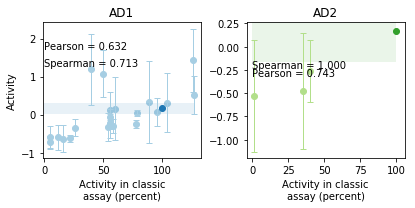

In [81]:
ClassicADsDict = {'E2K,E3K': 79, 'D7H,E11K': 58, 'P13K': 56, 'S13G': 300,'S15G': 300,'S13G_S15G': 300, 'L14Q,F19S': 56, 'Q16L,T18I': 219,
                  'E17K,D21H': 40, 'L22Q': 17,'L22Q_L22Q': 17, 'W23S': 22,'W23S_W23S_W23S': 22, 'L22Q,W23S': 5, 'K24T': 127,'K24T_K24T': 127,
                  'L25Q,L26H': 143, 'P27Y': 126, 'P27Y_P27Y': 126,
                  'E28K': 56,'E28K_E28K': 56, 'V31S,L32R': 96, 'D48H,D49H': 215, 'D61H,62K': 40, 'E17K,D21H,E28K': 54, 'D41H,D42H': 35,
                  'L22Q,W23S': 5,'L22R,W22S_L22R,W22S':5,'L22R,W23S':5,'L22Q,W23S_L22Q,W23S': 5.1,  'L22R,W22S': 0.2,
                  'E2L,E3Q': 89.1, 'P12S,P13T': 60.2, 'F19R': 15.7,'F19R_F19R': 15.7, 'L22R,W22S': 4.5, 'W23S': 44.8, 'L25R,L26S': 11.3, 'V31D,L32R': 104.3,
                  'P34R,V35S,P36T': 77.6, 'D41G,D42R': 55.3,'W53Q,F54S':1, 'P12S,P13T,P34R,V35S,P36T': 25.7,
                  'P27A': 50,'P27A_P27A_P27A39>A':50, 'P12A,P13A,P27A': 50,# artifically changed these values 20190604 to separate them from other papers
#                   'P27A': 500,'P27A_P27A_P27A39>A':500, 'P12A,P13A,P27A': 501
                 }

# Avg activity
indx =AvgActivtyDF.Classic==1
temp =AvgActivtyDF[indx]
temp['ClassicActivity'] = temp.ADname
temp2 = temp.replace({'ClassicActivity':ClassicADsDict})
ClassicMutantsDF_avg = temp2.sort_values(by='ClassicActivity',ascending=1)
fig = plt.figure(figsize=(6,3))
# ClassicMutantsDF_avg = ClassicMutantsDF
for i,AD in enumerate(['AD1','AD2']):
    ax = fig.add_subplot(1,2,i+1)
    temp = ClassicMutantsDF_avg[ClassicMutantsDF_avg.ADtype==AD]
    plt.scatter(temp.ClassicActivity, temp[currentItem],c=Mutcolors[AD])
    plt.errorbar(temp.ClassicActivity, temp[currentItem],temp.currentItem_SEM,c=Mutcolors[AD],capsize=3,linewidth=0,elinewidth=1)
    spear = scipy.stats.spearmanr(temp.ClassicActivity, temp[currentItem])
    pear = scipy.stats.pearsonr(temp.ClassicActivity, temp[currentItem])
    plt.text(0,max(temp[currentItem])*.9,'Spearman = %.3f'%spear[0])
    plt.text(0,max(temp[currentItem])*1.2,'Pearson = %.3f'%pear[0])
    plt.xlabel('Activity in classic\nassay (percent)')
    if i ==0:
        plt.ylabel('Activity')
    plt.title(AD)
    
    avgActivity,sem,width = WTdict_mean[AD],WTdict_sem[AD],max(max(temp.ClassicActivity),100)
    WTstdPatch = mpatches.Rectangle((0,avgActivity-sem),width,2*sem,alpha=0.1,facecolor=WTcolors[AD])
    plt.scatter(100,WTdict_mean[AD],c=WTcolors[AD])
    ax.add_patch(WTstdPatch)
plt.tight_layout()
plt.savefig('Figures/'+Folder+'/FiguresS1C_p53_ClassicMuts_CorrActivity.pdf')
plt.show()

In [80]:
# Export p53 data for publication

indx = AvgActivtyDF.HandDesigned
exportDF = AvgActivtyDF[indx]
# export all data
exportDF =AvgActivtyDF

exportcols = ['ADname','Zscore_Mean_p53','Zscore_SEM_p53',
             'p53_AD1', 'p53_AD2',
              'MSS11_NextSeq3_Sort4_manyPCRs_Activity',
              'MSS16_Sort1_Activity',
              'MSS17_Sort1_nextseq_Activity'
             ]
exportDF = exportDF[exportcols]
RenameColDict = {'Zscore_Mean_p53':'Activity_Zscore_mean', 'Zscore_SEM_p53':'Activity_Zscore_SEM',
       'MSS11_NextSeq3_Sort4_manyPCRs_Activity':'Biological_Replicate_1_Raw_Activity',
       'MSS16_Sort1_Activity':'Biological_Replicate_2_Raw_Activity',
       'MSS17_Sort1_nextseq_Activity':'Biological_Replicate_3_Raw_Activity',
#         'CorrectedPvalues':'CorrectedPvalues_FDR_5percent',        'SigDiff_Zscore':'SigDiffFromWT_Zscore',
#         'CITED2_N': 'CITED2', 'Hif1-AD2_46': u'Hif1alpha', 'p65': 'p65', 'stat3': 'Stat3', 'vp16N_C': 'VP16 H1',
#                  'shortname':'Variant_Name'
                }
exportDF=exportDF.rename(columns=RenameColDict)
exportDF.to_csv('../../Analysis_LC2_AcidBlobLibrary/Analysis/SuppDataSetsForPaper/SupplementalDataSet2_ActivityData_p53ADs_V2_alldat.csv')
########
# I renamed the WT ADs by hand.
indx = AvgActivtyDF.ADseq==p53_AD2
print AvgActivtyDF[indx].ADname
indx = AvgActivtyDF.ADseq_M==p53_AD1
print AvgActivtyDF[indx].ADname

ADseq
DDLMLSPDDIEQWFTEDPGPD    AD2_A>P_AD2_A>G_AD2_PA>P_MoveMotif_MoveMotif_M...
Name: ADname, dtype: object
ADseq
EEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAM    AD1core_A>P_AD1core_A>G_AD1core_PA>P_MoveMotif...
Name: ADname, dtype: object
